<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [131]:
!pip install ydata_profiling

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport

random.seed(42)
np.random.seed(42)

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here` Сиды фиксируем для воспроизводимости результатов

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [133]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

In [134]:
print("Колонки, в которых есть пропуски:", list(df_train.loc[:, df_train.isna().sum() != 0].columns))
print("Количество явных дубликатов:", df_train.duplicated().sum())
for_understand = df_train.duplicated(keep=False)
print("Строк, являющихся дубликатами:", for_understand.sum())

Колонки, в которых есть пропуски: ['mileage', 'engine', 'max_power', 'torque', 'seats']
Количество явных дубликатов: 985
Строк, являющихся дубликатами: 1478


**Ваш ответ здесь.**
### Ответ:

Основные выводы, которые можно сделать:
- Количество строк у нас 6999, но среди них встречается 493 строк дубликатов. И тут интересный факт, что мой код выше и дашбор по разному считает количество дубликатов: можно заметить, что строк участвующих в дубликатах равно 1478 = 493 + 985. Это нам говорит о том, что 493 - это количество уникальных строк, встречаемых 2 раза, а 985 - это сколько у этих строк дубликатов.
- А вот с пропусками нам повезло. Максимум 2.9% в колонке torque.
- У большинства колонок достаточно высокая корреляция. С одной стороны это хорошо, но с другой надо быть внимательным с мультиколлинеарностью.
- А еще есть признаки, которые больше похижи на числа, чем на текст. Надо на них внимательнее посмотреть.

In [135]:
ProfileReport(df_train, title="Profiling Report").to_file("your_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 266.39it/s]


Достаточно много пропущенных, количество дубликатов не так критично.

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [136]:
# Ваш код здесь

# Эта часть кода была взята и упрощена из моего годового
# проекта, где эту часть написал именно я

from pandas.api.types import (
    is_object_dtype,
    is_integer_dtype,
    is_float_dtype,
    is_bool_dtype,
    is_datetime64_any_dtype,
)
# словарь для хранения типов колонок
types = {
    "numeric_integer": [],
    "numeric_float": [],
    "binary": [],
    "categorical": [],
    "datetime": [],
    "text": []
}

# определяю типы данных по каждому столбцу
for col in df_train.columns:
    col_data = df_train[col]
    col_type = col_data.dtype

    if is_integer_dtype(col_data):
      types["numeric_integer"].append(col)

    if is_float_dtype(col_data):
      types["numeric_float"].append(col)

    if is_bool_dtype(col_data):
      types["binary"].append(col)

    if is_object_dtype(col_data):
      types["text"].append(col)

    if is_datetime64_any_dtype(col_data):
      types["datetime"].append(col)

numeric_cols = (
    types["numeric_integer"] + types["numeric_float"]
)
# функция для числовых признаков
def get_num_stat(df, numeric_cols):
    if len(numeric_cols) > 0:
        num_desc = df[numeric_cols].describe().T
        num_desc["idmax"] = [
            df[col].idxmax() for col in num_desc.index
        ]
        num_desc["idmin"] = [
            df[col].idxmin() for col in num_desc.index
        ]
        num_desc["IQR"] = num_desc["75%"] - num_desc["25%"]
        num_desc["skew"] = df[numeric_cols].skew()
        num_desc["kurtosis"] = df[numeric_cols].kurtosis()

        num_desc["missing_abs"] = df[numeric_cols].isna().sum()
        num_desc["missing_pct"] = df[numeric_cols].isna().mean()

        num_desc["is_outlier_max"] = [
            df[col].max()
            > (num_desc.loc[col, "75%"] + 1.5 * num_desc.loc[col, "IQR"])
            for col in num_desc.index
        ]
        num_desc["is_outlier_min"] = [
            df[col].min()
            < (num_desc.loc[col, "25%"] - 1.5 * num_desc.loc[col, "IQR"])
            for col in num_desc.index
        ]
        return num_desc

#Функция для текстовых признаков
def get_text_stat(df, text_cols):
    if len(types["text"]) > 0:
        text_desc = pd.DataFrame(index=types["text"])
        for col in types["text"]:
            col_data = df[col].dropna().astype(str)

            lengths = col_data.apply(len)

            text_desc.loc[col, "mean_len"] = lengths.mean()
            text_desc.loc[col, "median_len"] = lengths.median()
            text_desc.loc[col, "max_len"] = lengths.max()
            text_desc.loc[col, "missing_pct"] = df[col].isna().mean()
            text_desc.loc[col, "unique_cnt"] = col_data.nunique()
            
    return text_desc

print("Статистика по числовым данным для df_train")
display(get_num_stat(df_train, numeric_cols))
print("Статистика по числовым данным для df_test")
display(get_num_stat(df_test, numeric_cols))

print("Статистика по текстовым данным для df_train")
display(get_text_stat(df_train, types['text']))
print("Статистика по текстовым данным для df_test")
display(get_text_stat(df_test, types['text']))

Статистика по числовым данным для df_train


,count,mean,std,min,25%,50%,75%,max,idmax,idmin,IQR,skew,kurtosis,missing_abs,missing_pct,is_outlier_max,is_outlier_min
year,6999.0,2013.818403,4.053095,1983.0,2011.0,2015.0,2017.0,2020.0,96,277,6.0,-1.077302,1.767215,0,0.000000,False,True
selling_price,6999.0,639515.197171,808941.911915,29999.0,254999.0,450000.0,675000.0,10000000.0,151,4890,420001.0,4.210756,21.308644,0,0.000000,True,False
km_driven,6999.0,69584.615517,57724.001817,1.0,35000.0,60000.0,97000.0,2360457.0,3003,6818,62000.0,12.069152,410.797989,0,0.000000,True,False
seats,6797.0,5.419008,0.965767,2.0,5.0,5.0,5.0,14.0,3906,5058,0.0,2.011174,4.045443,202,0.028861,True,True


Статистика по числовым данным для df_test


,count,mean,std,min,25%,50%,75%,max,idmax,idmin,IQR,skew,kurtosis,missing_abs,missing_pct,is_outlier_max,is_outlier_min
year,1000.0,2013.681000,4.012149,1995.0,2011.0,2014.0,2017.0,2020.0,442,116,6.0,-1.022356,1.215884,0,0.000,False,True
selling_price,1000.0,617901.042000,758553.860710,31000.0,250000.0,434999.0,670000.0,6000000.0,520,381,420000.0,4.214831,21.438457,0,0.000,True,False
km_driven,1000.0,71393.341000,48486.218662,1303.0,37000.0,61500.0,100000.0,375000.0,207,825,63000.0,1.422857,3.833756,0,0.000,True,False
seats,981.0,5.410805,0.919985,4.0,5.0,5.0,5.0,9.0,199,23,0.0,1.642458,1.777574,19,0.019,True,True


Статистика по текстовым данным для df_train


,mean_len,median_len,max_len,missing_pct,unique_cnt
name,25.227747,24.0,54.0,0.000000,1924.0
fuel,5.963138,6.0,6.0,0.000000,4.0
seller_type,9.623946,10.0,16.0,0.000000,3.0
transmission,6.387484,6.0,9.0,0.000000,2.0
owner,11.442778,11.0,20.0,0.000000,5.0
mileage,9.433132,9.0,11.0,0.028861,386.0
engine,6.835074,7.0,7.0,0.028861,120.0
max_power,7.793179,8.0,11.0,0.028004,316.0
torque,16.250441,14.0,27.0,0.029004,419.0


Статистика по текстовым данным для df_test


,mean_len,median_len,max_len,missing_pct,unique_cnt
name,24.857000,24.0,49.0,0.000,621.0
fuel,5.973000,6.0,6.0,0.000,4.0
seller_type,9.628000,10.0,16.0,0.000,3.0
transmission,6.369000,6.0,9.0,0.000,2.0
owner,11.524000,11.0,20.0,0.000,5.0
mileage,9.405708,9.0,11.0,0.019,237.0
engine,6.823649,7.0,7.0,0.019,88.0
max_power,7.778797,8.0,10.0,0.019,182.0
torque,16.293578,14.0,27.0,0.019,226.0


### Ответ:
Сравнение медианы и среднего для числовых признаков

year:
- В train среднее примерно 2013,8, медиана 2015;
- В test среднее 2013,7, медиана 2014;
- Разница небольшая, значения почти одинаковые.

selling_price:
- В train среднее примерно 639000, медиана 450000;
- В test среднее примерно 618000, медиана 435000;
- В тесте цены чутка ниже.

km_driven:
- В train среднее примерно 70000, медиана 60000;
- В test среднее 71400, медиана 61500;
- Тут тоже весьма все похоже.

seats:
- В train среднее примерно 5,42, медиана 5;
- В test среднее 5,41, медиана 5;
- Здесь всё совпадает, различий ооооочень мало.

Если посмотреть еще на IQR по каждой из числовых данных, то сразу же станет понятно, что train и test демонстрируют очень похожие распределения.

Текстовые данные тоже похожим образом распределены. Выделяестя из общей картины только max_power и torque. Надо это держать в голове, но есть вероятность, что это никак не повлияет в дальнейшем.

Вывод: train и test очень хорошо согласованы. Каких-то сильных выбросов, смещения распределений и всего остального не видно. Значит можно приступать к работе :)

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [137]:
# your code here
# беру все признаки, кроме таргета
feature_cols = df_train.columns.drop("selling_price")
target = ["selling_price"]

# фиксирую, какие строки повторяются по признакам
df_train_dup = df_train.duplicated(subset= feature_cols)
display(df_train[df_train_dup])

# удаляю повторяющиеся строки, оставляю только первую
df_train = df_train.drop_duplicates(subset= feature_cols, keep="first")

# обновляю индексы после удаления
df_train = df_train.reset_index(drop=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [138]:
assert df_train.shape == (5840, 13)

### Ответ:
Скрытые дубликаты могут скрываться в текстовых данных и их как раз не сможет вычислить .duplicated(), потому что как факт они отличаются друг от друга. Для того, чтобы их отловить нужно постараться разбить текстовые данные на разные компоненты, потому что, например в mileage или engine есть численное значение и текст, который можно отделить друг от друга. Например, .duplicated() не вчислит если в одной ячейке написано "1248 CC", в другой "СС 1248". А еще в идеале привести регистр текста к одинаковому виду.

Может быть такое, что где-то написано одно и то же, но отличаются единицами измерения. Например, в столбце max_power значения написаны в "лошадиных силах" и "Ваттах"

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [139]:
# your code here
import re
# метод определения чисел и слов нашел в официальном сайте библитеки re

# функция, которая вытаскивает из текста все числа и все слова
def split_dig_words(text):
    text = str(text).lower()
    text = text.replace(",", "")
    numbers = re.findall(r'\d+(?:\.\d+)?', text)
    words = re.findall(r'[a-zA-Z]+', text)
    return numbers, words

# беру первое число как сам момент, если единица измерения kgm, топеревожу в Н*м
# если единиц нет или указано nm, просто float
def creat_torque_col(numbers, words):
    if len(numbers) == 0:
        return np.nan
    if len(words) == 0:
        return float(numbers[0])
    if "kgm" in words:
        return float(numbers[0]) * 9.80665
    else:
        return float(numbers[0])

# функция, которая вытаскивает максимум из двух значений
# заранее убиделся в том, что max(len(df['torque_words'])) == 3
def creat_max_torque_rpm_col(numbers):
    if len(numbers) <= 1:
        return np.nan
    else:
        return max(numbers[1:])

# функция очистки max_power
def clearing_max_power(text):
    text = str(text).replace(",", "")
    number = re.search(r'\d+(\.\d+)?', str(text))
    return float(number.group()) if number else np.nan


# очищаю пробег, двигатель и мощность в train
df_train['mileage'] = df_train['mileage'].apply(lambda x: str(x).split()[0] if pd.notna(x) else x).astype(float)
df_train['engine'] = df_train['engine'].apply(lambda x: str(x).split()[0] if pd.notna(x) else x).astype(float)
df_train['max_power'] = df_train['max_power'].apply(lambda x: clearing_max_power(x))

# достаю числа и слова из torque и сохраняю во временные столбцы
df_train[['torque_numbers', 'torque_words']] = (
    df_train['torque'].apply(lambda x: pd.Series(split_dig_words(x)))
)

# создаю чистый момент силы
df_train['torque_clean'] = df_train.apply(
    lambda x: creat_torque_col(x['torque_numbers'], x['torque_words']),
    axis=1
)

# создаю максимальные обороты
df_train['max_torque_rpm'] = (
    df_train['torque_numbers'].apply(lambda x: creat_max_torque_rpm_col(x))
).astype(float)
df_train['torque'] = df_train['torque_clean']

# удаляю временные столбцы
df_train.drop(columns=['torque_numbers', 'torque_words', 'torque_clean'], inplace=True)

df_test['mileage'] = df_test['mileage'].apply(lambda x: str(x).split()[0] if pd.notna(x) else x).astype(float)
df_test['engine'] = df_test['engine'].apply(lambda x: str(x).split()[0] if pd.notna(x) else x).astype(float)
df_test['max_power'] = df_test['max_power'].apply(lambda x: clearing_max_power(x))

# делаю то же самое для test
df_test[['torque_numbers', 'torque_words']] = (df_test['torque'].apply(lambda x: pd.Series(split_dig_words(x))))
df_test['torque_clean'] = df_test.apply(
    lambda x: creat_torque_col(x['torque_numbers'], x['torque_words']),
    axis=1
)
df_test['max_torque_rpm'] = (
    df_test['torque_numbers'].apply(lambda x: creat_max_torque_rpm_col(x))
).astype(float)
df_test['torque'] = df_test['torque_clean']
df_test.drop(columns=['torque_numbers', 'torque_words', 'torque_clean'], inplace=True)

display(df_train)
df_train.info()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.750000,5.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.100000,5.0,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.000000,5.0,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.700000,5.0,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.359600,5.0,2750.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5654 non-null   float64
 9   engine          5654 non-null   float64
 10  max_power       5656 non-null   float64
 11  torque          5653 non-null   float64
 12  seats           5654 non-null   float64
 13  max_torque_rpm  5650 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [140]:
# your code here
# словарь для хранения типов колонок
types = {
    "numeric_integer": [],
    "numeric_float": [],
    "binary": [],
    "categorical": [],
    "datetime": [],
    "text": []
}

# определяю типы данных по каждому столбцу
for col in df_train.columns:
    col_data = df_train[col]
    col_type = col_data.dtype

    if is_integer_dtype(col_data):
      types["numeric_integer"].append(col)

    if is_float_dtype(col_data):
      types["numeric_float"].append(col)

    if is_bool_dtype(col_data):
      types["binary"].append(col)

    if is_object_dtype(col_data):
      types["text"].append(col)

    if is_datetime64_any_dtype(col_data):
      types["datetime"].append(col)

numeric_cols = (
    types["numeric_integer"] + types["numeric_float"]
)

# считаю медиану по числовым колонкам
median = df_train[numeric_cols].median()

# заполняю пропуски медианой в train и test
df_train = df_train.fillna(median)
df_test = df_test.fillna(median)

# display(df_train.info())
# display(df_test.info())

print(median)

year                2014.00
selling_price     405000.00
km_driven          70000.00
mileage               19.37
engine              1248.00
max_power             81.86
torque               160.00
seats                  5.00
max_torque_rpm      3000.00
dtype: float64


### Ответ:

Для того, чтобы применить среднее значение нам необходимо для начала иследовать данные на наличие выбросов. Если их нет, то можно воспользоваться и средним значением. Но проще просто не париться и брать медиану, которая как раз к выбросам не чуствительна.


Если говорить про то, как лучше применить медиану для заполнения, то, на мой взгляд, лучше использовать медиану тренировочных данных для train и test, чтобы в будущем модели с предсказаниями не запутались. Ведь если у test`а будет своя медина, то это изменит всю статистику, будет другое распределение, другой центр и тд. А модели, обученные на train тогда дадут хуже предсказание.

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [141]:
# your code here
# привожу engine и seats к целочисленному типу
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

# df_train.info()
# df_test.info()

# просто смотрю, сколько в seats уникальных значений
print("Количество уникальных данных в df_train['seats']:",df_train['seats'].nunique())

Количество уникальных данных в df_train['seats']: 9


### Ответ:
Потому что seats имеет дискретные значения и можно по количеству мест определить тип автомобиля. Поэтому можно разбить автомобили по количеству сидений и на этом делать какие-то выводы.

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [142]:
print("Статистика по числовым данным для df_train")
display(get_num_stat(df_train, numeric_cols))
print("Статистика по числовым данным для df_test")
display(get_num_stat(df_test, numeric_cols))

print("Статистика по текстовым данным для df_train")
display(get_text_stat(df_train, types['text']))
print("Статистика по текстовым данным для df_test")
display(get_text_stat(df_test, types['text']))

Статистика по числовым данным для df_train


,count,mean,std,min,25%,50%,75%,max,idmax,idmin,IQR,skew,kurtosis,missing_abs,missing_pct,is_outlier_max,is_outlier_min
year,5840.0,2013.428425,4.095622,1983.00000,2011.00,2014.00,2017.00000,2.020000e+03,96,274,6.00000,-1.019470,1.692979,0,0.0,False,True
selling_price,5840.0,522960.091096,535432.001912,29999.00000,250000.00,405000.00,640000.00000,1.000000e+07,151,4152,390000.00000,5.593861,52.423427,0,0.0,True,False
km_driven,5840.0,73952.242466,60071.136504,1.00000,39000.00,70000.00,100000.00000,2.360457e+06,2680,5683,61000.00000,12.645506,416.024644,0,0.0,True,False
mileage,5840.0,19.430841,3.985973,0.00000,16.95,19.37,22.30000,4.200000e+01,151,533,5.35000,-0.175057,0.872092,0,0.0,True,True
engine,5840.0,1429.448973,485.662834,624.00000,1197.00,1248.00,1498.00000,3.604000e+03,1208,315,301.00000,1.266954,1.120626,0,0.0,True,True
max_power,5840.0,87.906371,31.640418,0.00000,68.00,81.86,99.00000,4.000000e+02,151,476,31.00000,1.799694,6.046694,0,0.0,True,True
torque,5840.0,175.930478,116.757608,47.07192,111.80,160.00,200.05566,3.726527e+03,633,4284,88.25566,8.660037,181.349999,0,0.0,True,False
seats,5840.0,5.426712,0.982344,2.00000,5.00,5.00,5.00000,1.400000e+01,3330,4305,0.00000,2.009875,4.079385,0,0.0,True,True
max_torque_rpm,5840.0,3039.545668,917.140707,38.70000,2250.00,3000.00,4000.00000,2.180000e+04,3936,633,1750.00000,1.591731,28.784602,0,0.0,True,False


Статистика по числовым данным для df_test


,count,mean,std,min,25%,50%,75%,max,idmax,idmin,IQR,skew,kurtosis,missing_abs,missing_pct,is_outlier_max,is_outlier_min
year,1000.0,2013.681000,4.012149,1995.0,2011.00,2014.000,2017.0,2.020000e+03,442,116,6.00,-1.022356,1.215884,0,0.0,False,True
selling_price,1000.0,617901.042000,758553.860710,31000.0,250000.00,434999.000,670000.0,6.000000e+06,520,381,420000.00,4.214831,21.438457,0,0.0,True,False
km_driven,1000.0,71393.341000,48486.218662,1303.0,37000.00,61500.000,100000.0,3.750000e+05,207,825,63000.00,1.422857,3.833756,0,0.0,True,False
mileage,1000.0,19.338810,3.951750,0.0,16.55,19.370,22.3,3.226000e+01,195,130,5.75,-0.110715,0.003407,0,0.0,True,True
engine,1000.0,1454.876000,521.995740,624.0,1197.00,1248.000,1582.0,3.604000e+03,15,23,385.00,1.189063,0.900976,0,0.0,True,False
max_power,1000.0,90.841670,34.893389,34.2,69.00,82.425,102.0,2.800000e+02,15,542,33.00,1.594136,3.725303,0,0.0,True,False
torque,1000.0,177.617377,103.734516,48.0,111.70,160.000,205.0,1.421964e+03,108,405,93.30,3.672984,33.266970,0,0.0,True,False
seats,1000.0,5.403000,0.912921,4.0,5.00,5.000,5.0,9.000000e+00,199,23,0.00,1.672815,1.890972,0,0.0,True,True
max_torque_rpm,1000.0,3088.776000,887.655682,500.0,2500.00,3000.000,4000.0,5.200000e+03,11,405,1500.00,0.117384,-0.837881,0,0.0,False,False


Статистика по текстовым данным для df_train


,mean_len,median_len,max_len,missing_pct,unique_cnt
name,25.221918,24.0,54.0,0.0,1924.0
fuel,5.956849,6.0,6.0,0.0,4.0
seller_type,9.620205,10.0,16.0,0.0,3.0
transmission,6.258904,6.0,9.0,0.0,2.0
owner,11.498459,11.0,20.0,0.0,5.0


Статистика по текстовым данным для df_test


,mean_len,median_len,max_len,missing_pct,unique_cnt
name,24.857,24.0,49.0,0.0,621.0
fuel,5.973,6.0,6.0,0.0,4.0
seller_type,9.628,10.0,16.0,0.0,3.0
transmission,6.369,6.0,9.0,0.0,2.0
owner,11.524,11.0,20.0,0.0,5.0


### Ответ:

Если посмотреть на статистику, которая была раньше и текущаю, то можно заметить сильное различик в столбцах selling_price и km_driven, но скорее всего это **не связано** с тем, что мы заполнили все медианами, потому что тогда среднее и медиана бы не изменилась сильно, а связано с тем, что мы удалили много строк-дубликатов.

Датасет сильно уменьшился - раньше было 6999, а стало 5840, и это повлияло на статистику, так как уменьшилась выборка. Именно это и привело к заметному изменению статистик в selling_price и km_driven, а не операция fillna.

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

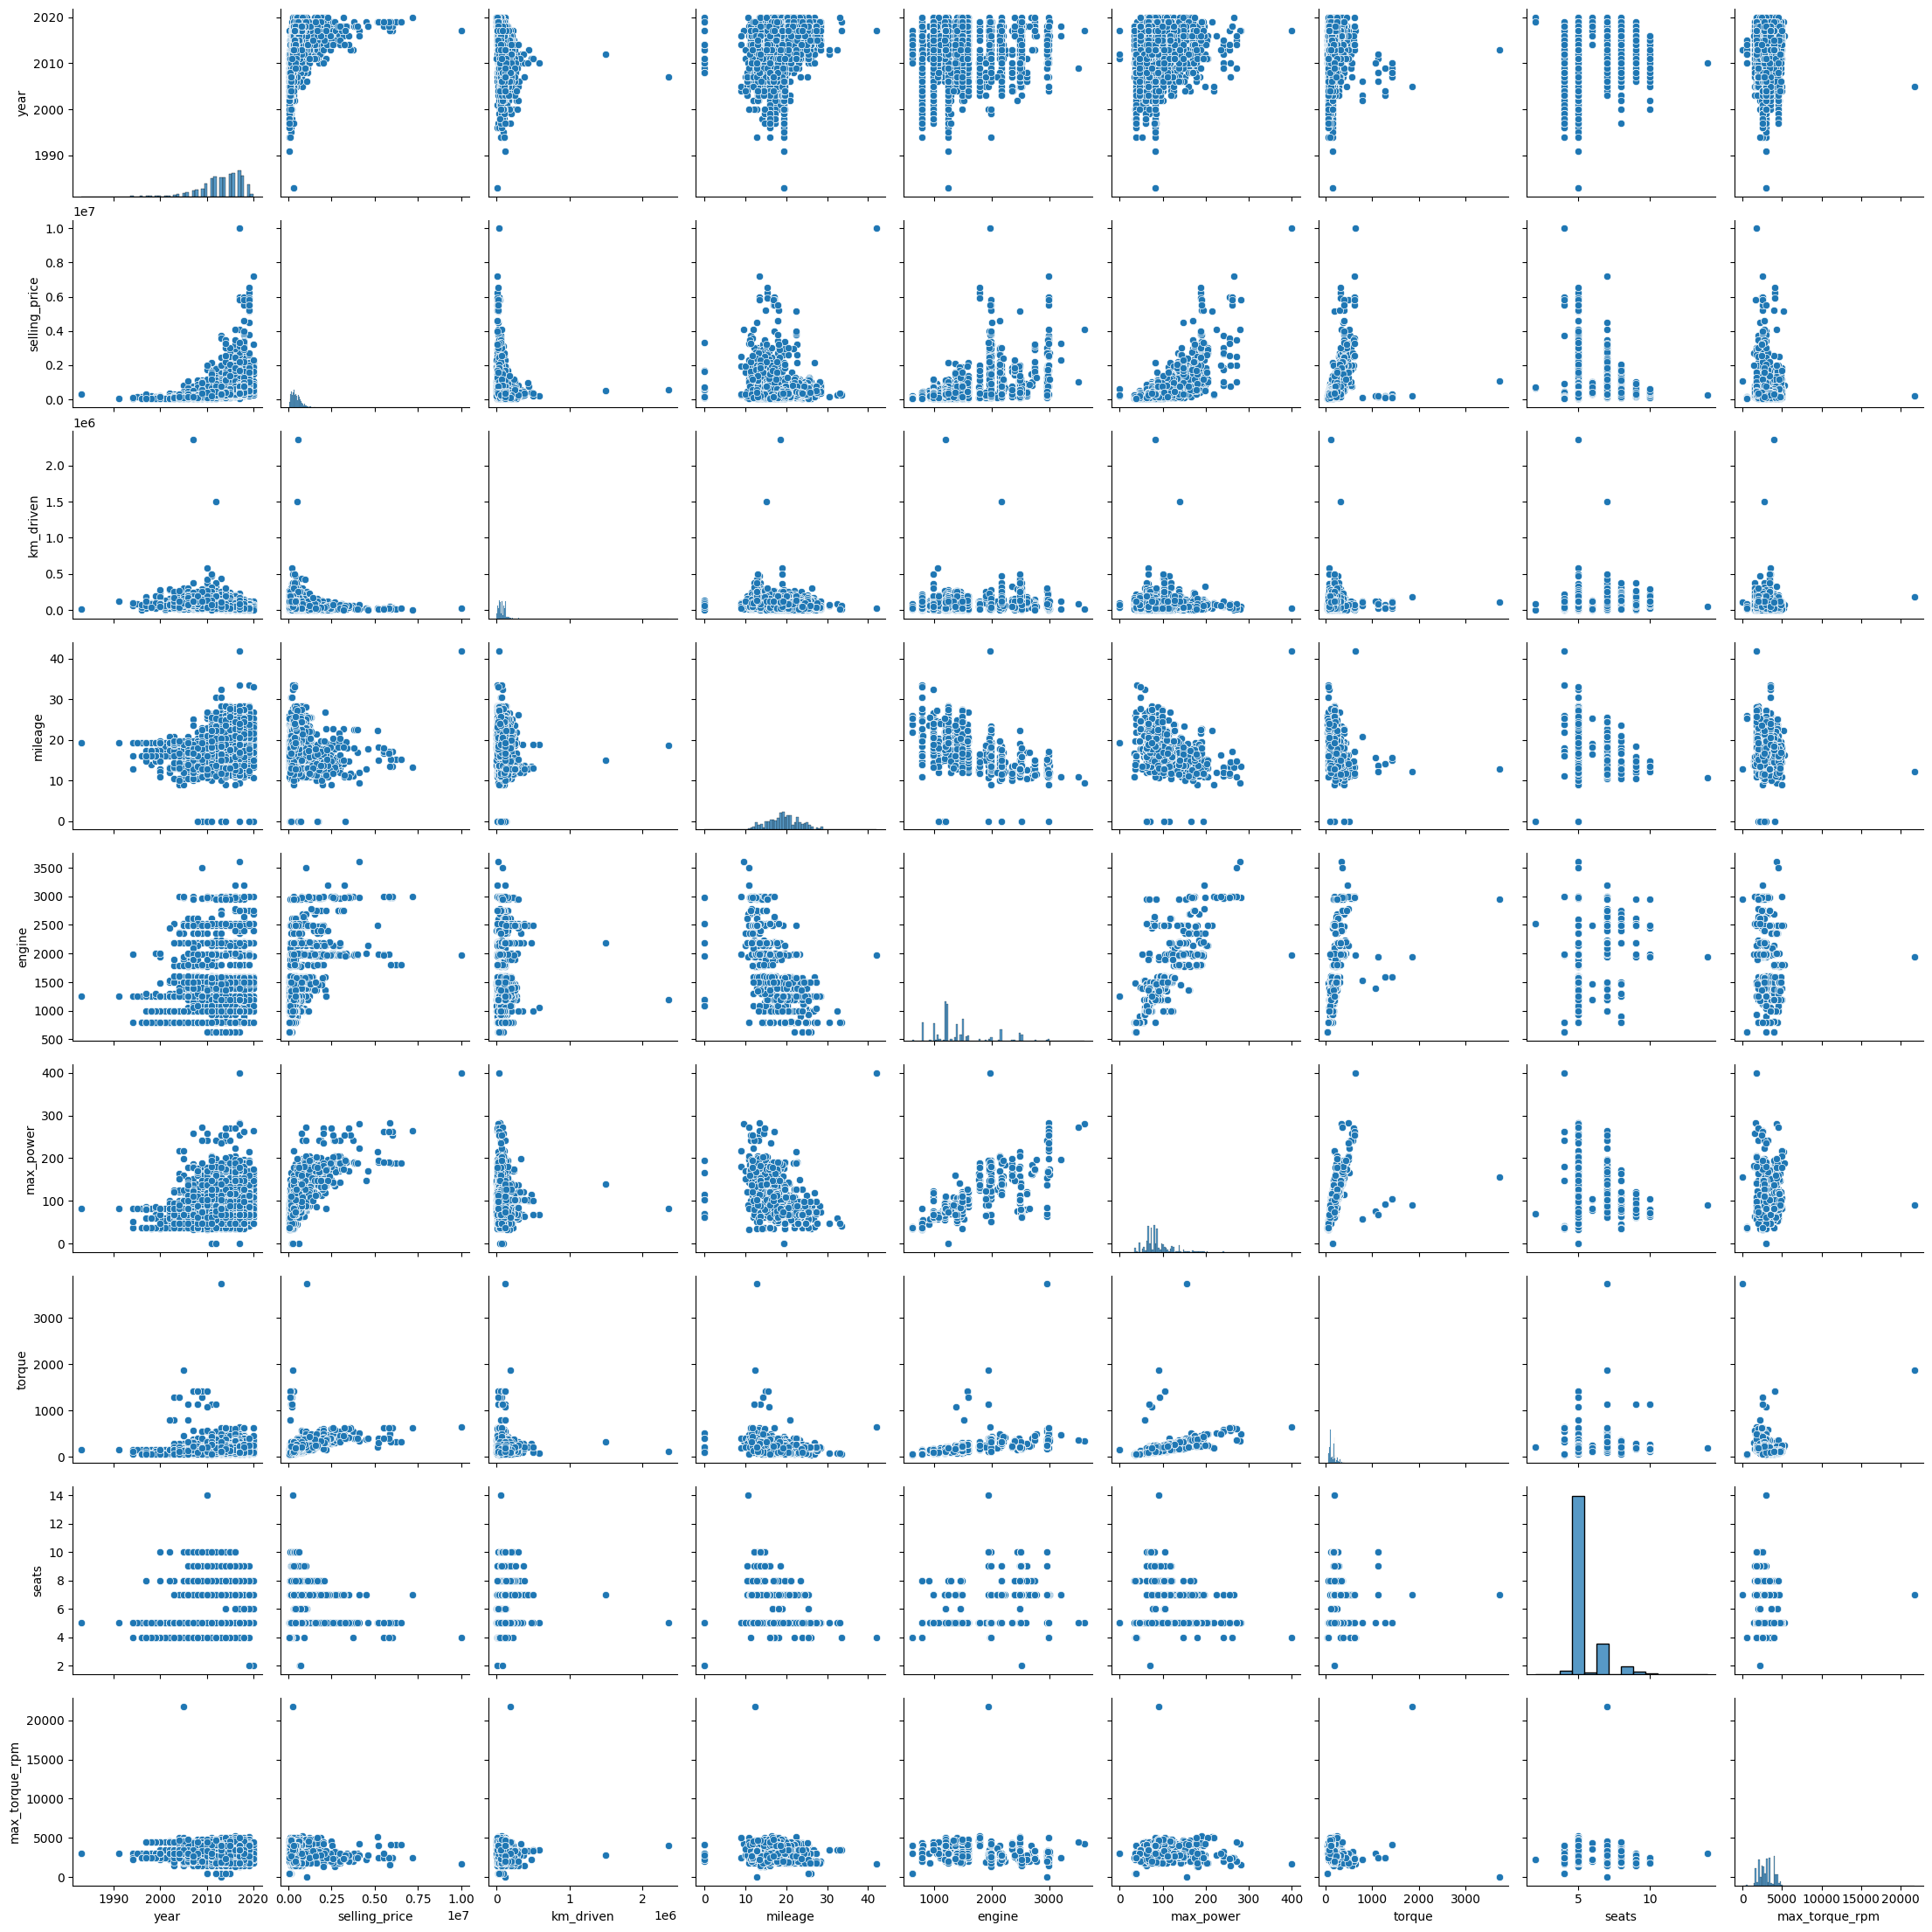

In [143]:
%matplotlib inline

sns.pairplot(df_train[numeric_cols])
plt.show()

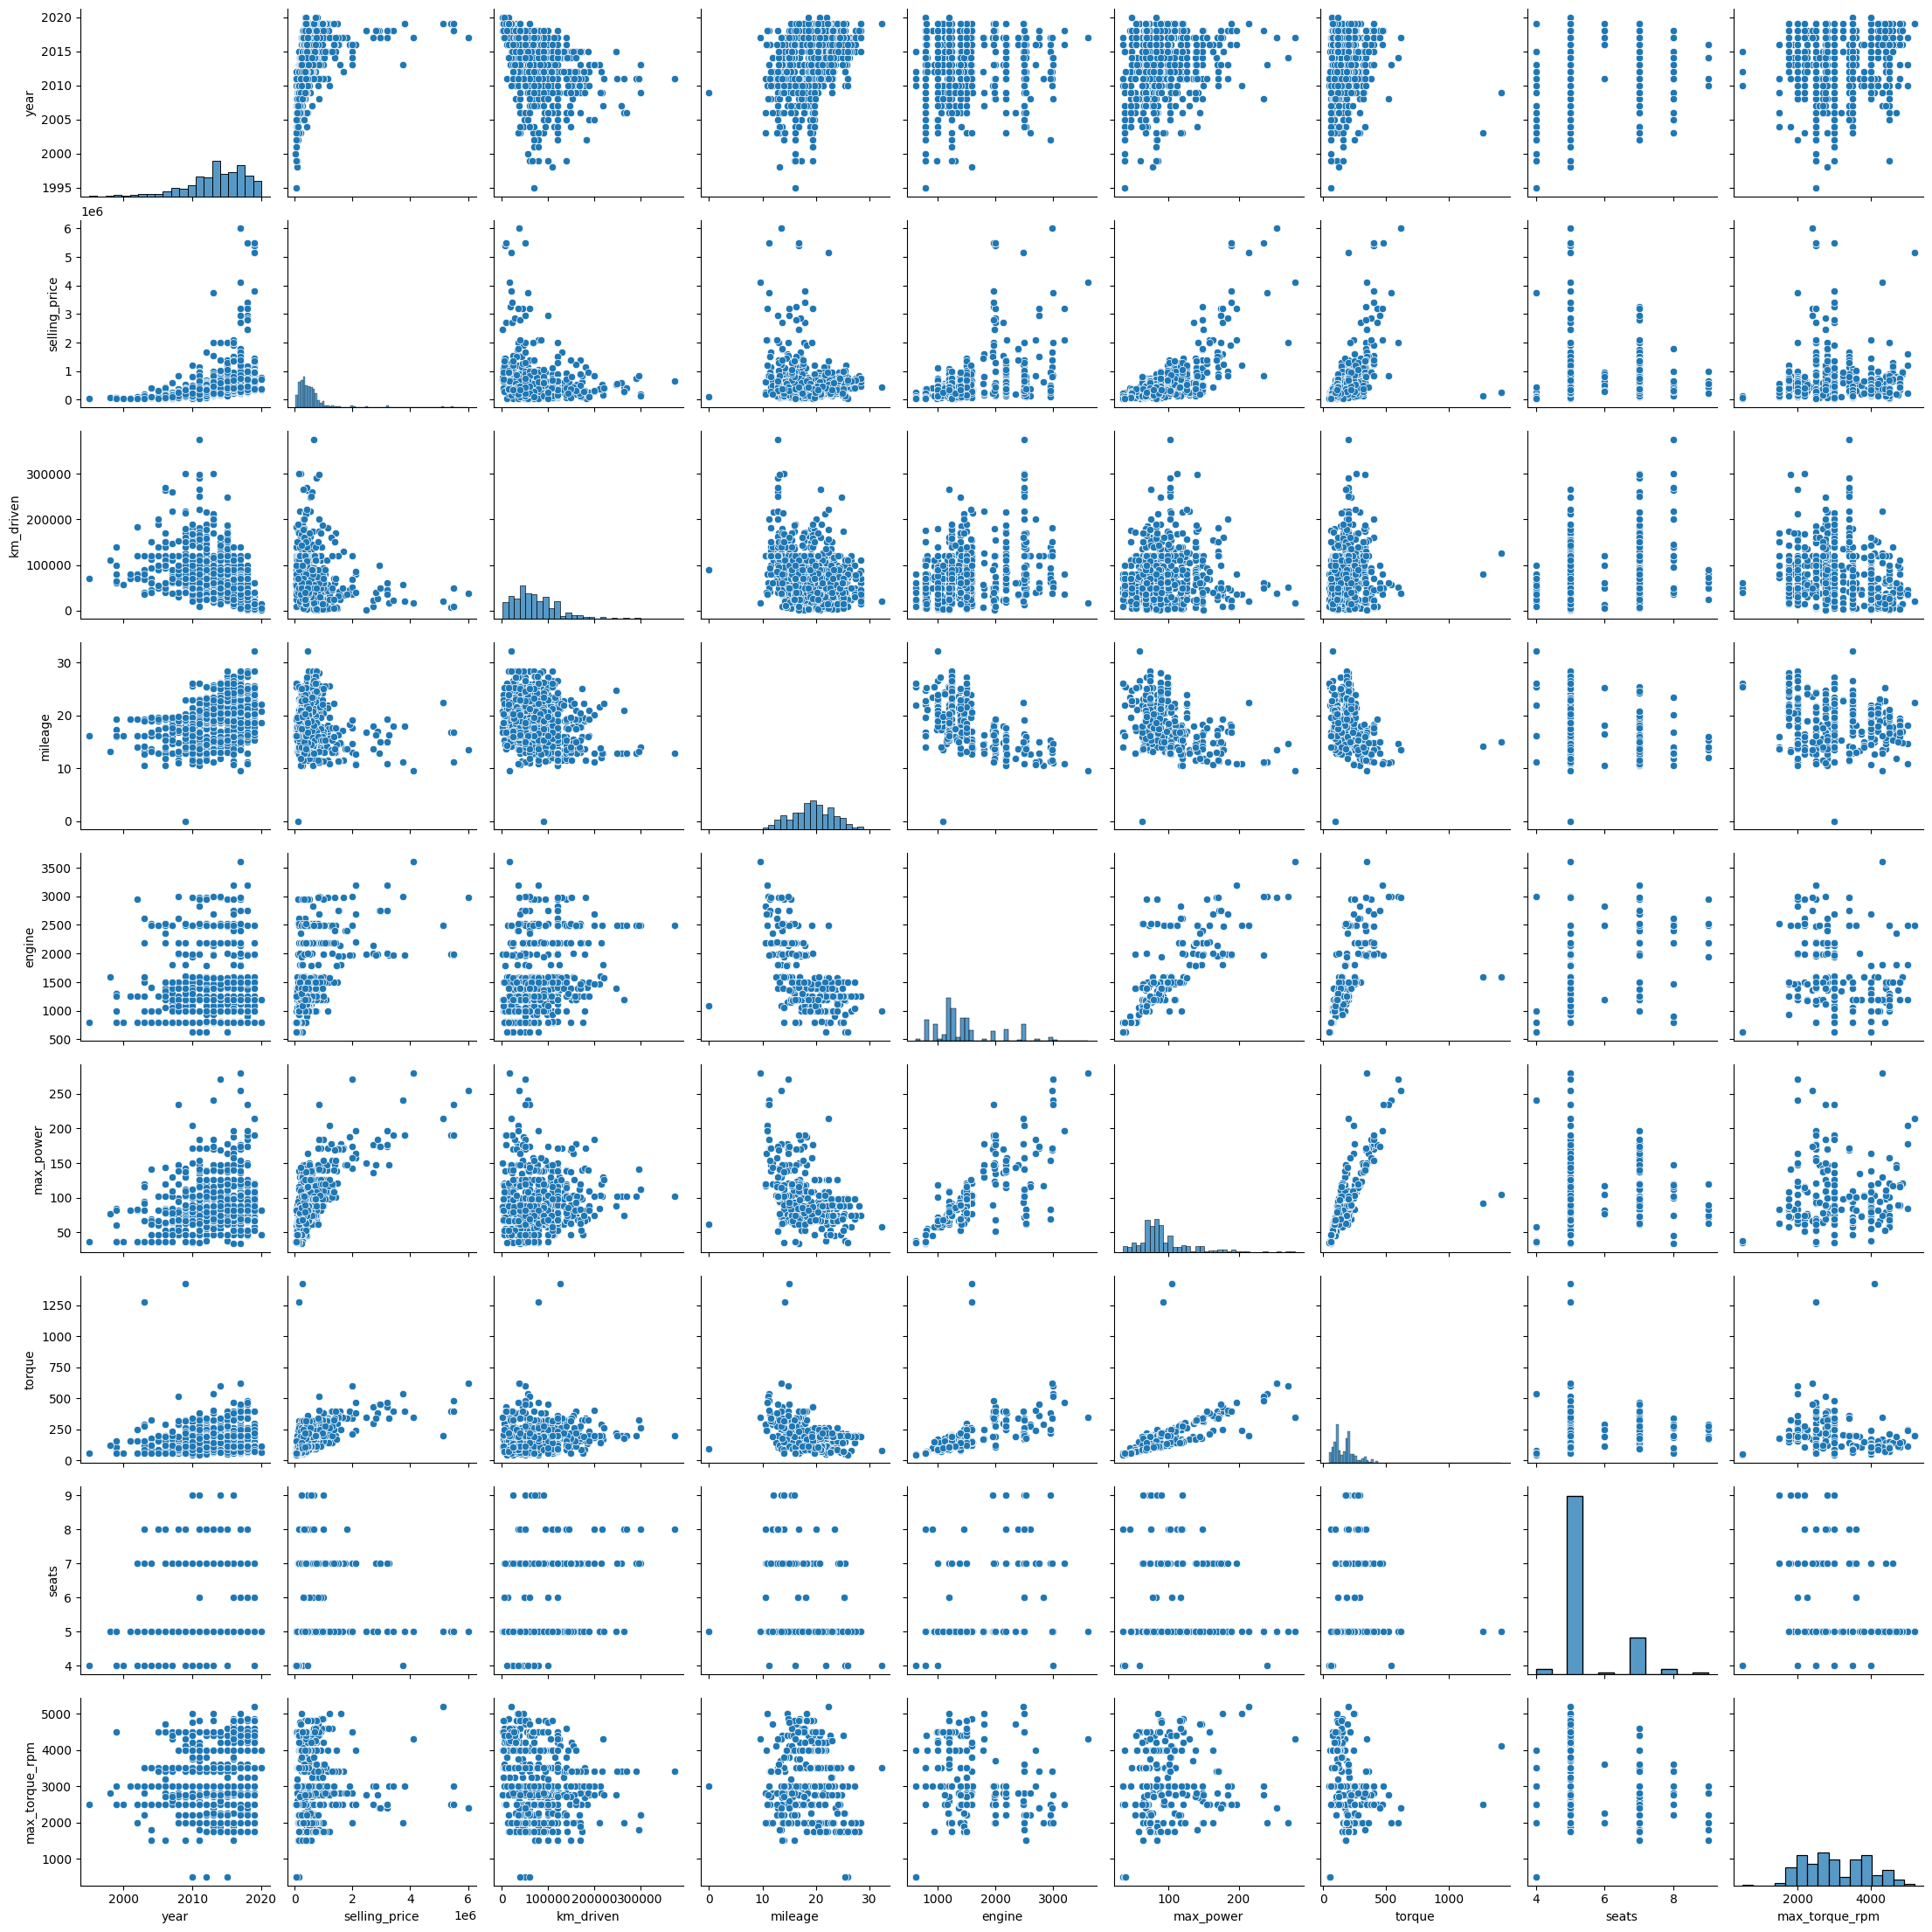

In [144]:
%matplotlib inline
sns.pairplot(df_test[numeric_cols])
plt.show()

### Ответ:

Если смотреть исключительно только на таргет и как выглядит распределение других признаков с таргетом, то можно заметить, что постепенно растут значения по фичам year, engine, max_power и torque. Значит можно сделать вывод, что скорее всего у них положительная корреляция отличная от нуля. А вот признак km_driven резко идет вниз, что может тоже говорить, что есть корреляция, но уже отрицательная.

Поэтому я думаю, что предположить как одни признаки влияют на другие можно, но все равно лучше посмотреть на таблицу коррелации, чтобы в этом убедиться.

Касательно df_test, то на мой взгляд они показывают похожие распределения. Причем зависимость таргета от km_driven на тестовых данных выглядят даже лучше, чем доказывает тот факт, что у них будте отрицательная корреляция.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

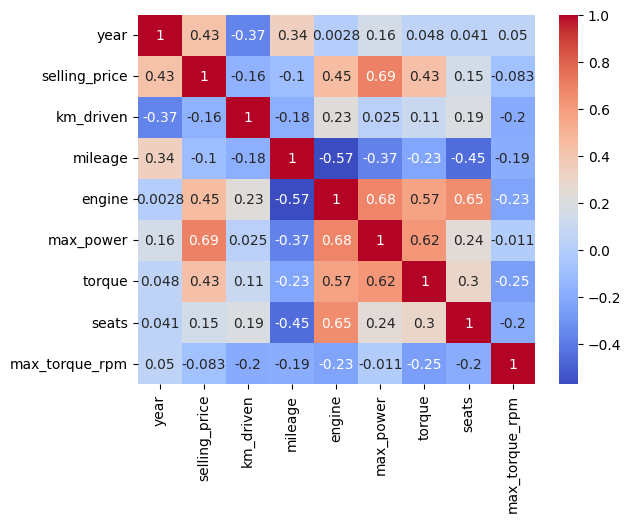

In [145]:
# your code here
corr_matrix = df_train[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

### Ответ:

1. Наименее скоррелированые признаки year и engine. У них -0.0028
2. Наиболее положительная сильная линейная зависимость между selling_price и max_power. У них 0.69
3. Я тут немного запутался в формулировке... Как я понял и сюда по корреляции, чем раньше машина выпустилась, тем больше у нее пробег. Так что утверждение верное, если я понял :)
4. По умолчанию в pd.corr() используется корреляция Пирсона. Потому что она работает только с числовыми данными.

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


### !!!
Функию корреляции Пирсона взял [отсюда](https://stackoverflow.com/questions/3949226/calculating-pearson-correlation-and-significance-in-python), но переделал использяю np

In [146]:
# your code here

# функция, которая ранжирует значения (если одинаковые, то ставлю средний ранг)
def rankdata_correct(values):
    values = np.asarray(values)
    order = np.argsort(values)
    ranks = np.zeros(len(values), dtype=float)
    ranks[order] = np.arange(1, len(values) + 1)
    for val in np.unique(values):
        meet = np.where(values == val)[0]
        if len(meet) > 1:
            ranks[meet] = ranks[meet].mean()
    return ranks

# считаю корреляцию Пирсона вручную
def pearsonr(x, y):
    # Assume len(x) == len(y)
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    n = len(x)

    sum_x = float(np.sum(x))
    sum_y = float(np.sum(y))
    sum_x_sq = np.sum(x * x)
    sum_y_sq = np.sum(y * y)
    psum = np.sum(x * y)

    num = psum - (sum_x * sum_y / n)
    den = pow((sum_x_sq - pow(sum_x, 2) / n) * (sum_y_sq - pow(sum_y, 2) / n), 0.5)

    if den == 0:
        return 0.0

    return num / den

# спирман
def spearman_corr(x, y):
    rx = rankdata_correct(x)
    ry = rankdata_correct(y)
    return pearsonr(rx, ry)

n = len(numeric_cols)

# создаю пустую матрицу корреляций
corr_matrix = pd.DataFrame(np.zeros((n, n)), columns=numeric_cols, index=numeric_cols)

# пробегаюсь по всем парам числовых колонок и считаю спирман
for i, col1 in enumerate(numeric_cols):
    for j, col2 in enumerate(numeric_cols):
        x = df_train[col1].values
        y = df_train[col2].values
        corr_matrix.loc[col1, col2] = spearman_corr(x, y)

display(corr_matrix)



,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.000000,0.707123,-0.569659,0.346132,-0.038056,0.165798,0.102603,0.048291,0.078478
selling_price,0.707123,1.000000,-0.295665,0.026186,0.463577,0.612258,0.582414,0.317605,-0.119644
km_driven,-0.569659,-0.295665,1.000000,-0.198466,0.304504,0.040919,0.242934,0.195317,-0.316708
mileage,0.346132,0.026186,-0.198466,1.000000,-0.429871,-0.308824,-0.162381,-0.435458,-0.183617
engine,-0.038056,0.463577,0.304504,-0.429871,1.000000,0.713113,0.842430,0.527716,-0.364316
max_power,0.165798,0.612258,0.040919,-0.308824,0.713113,1.000000,0.779600,0.304857,-0.017381
torque,0.102603,0.582414,0.242934,-0.162381,0.842430,0.779600,1.000000,0.438233,-0.517691
seats,0.048291,0.317605,0.195317,-0.435458,0.527716,0.304857,0.438233,1.000000,-0.190665
max_torque_rpm,0.078478,-0.119644,-0.316708,-0.183617,-0.364316,-0.017381,-0.517691,-0.190665,1.000000


interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


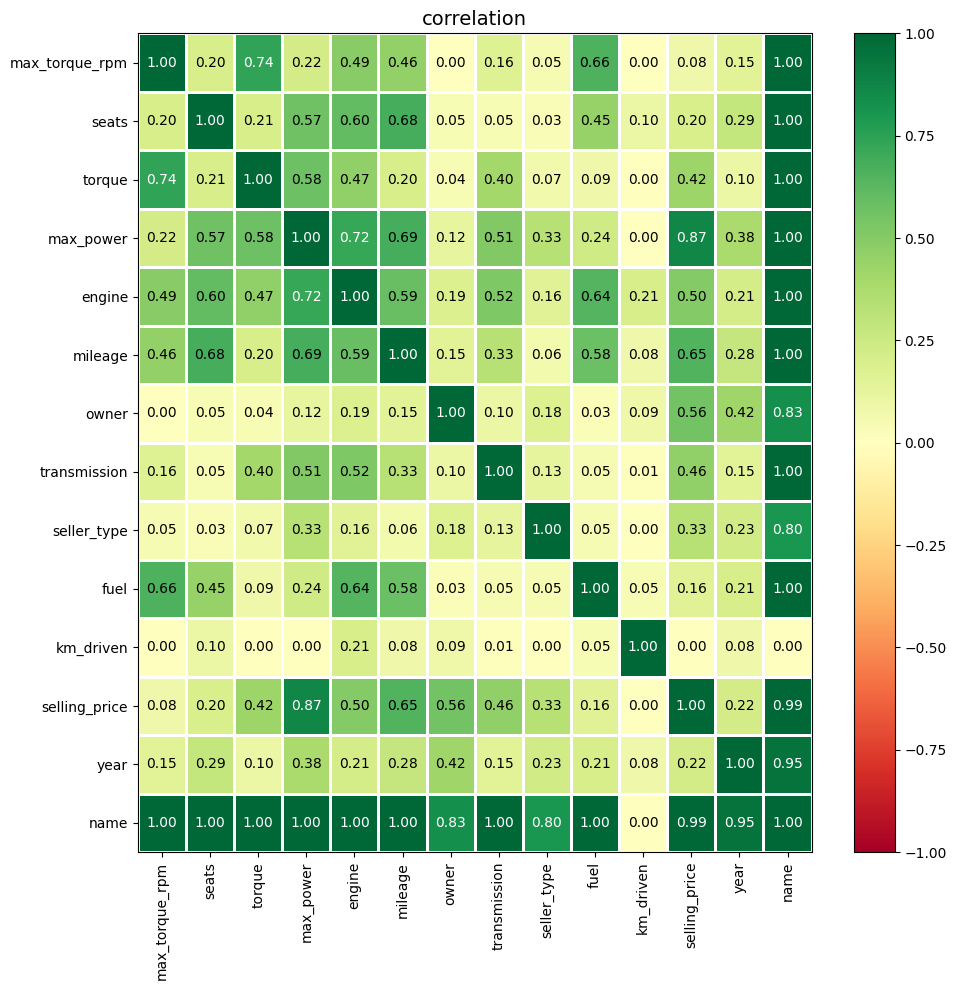

In [147]:
from phik.report import plot_correlation_matrix
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# считаю матрицу Phik для всех колонок
corr_phik = df_train.phik_matrix()

plot_correlation_matrix(
    corr_phik.values,
    corr_phik.columns,
    corr_phik.index,
    figsize=(10, 10)
)

plt.show()

### Ответ:

Если посмотреть на распределение Пирсона и Спирмена, то можно заметить, что некоторые значения стали коррелировать слабее, а некоторые наоборот сильно выросли. Сразу бросается в глаза, что корреляция между torque и engine теперь примерно 0.84, что является очень высоким значением, и зависимость таргет от других фич тоже стала выражена сильнее. При этом признаки, которые и раньше показывали слабую связь, так и остались слабо коррелируемыми. Теперь у max_power и selling_price значение примерно 0.61, но при этом year показывает более сильное влияние на таргет = 0.7, чем это было видно по Пирсона.

Кстати, интересный факт. Мы можем включить еще в корреляцию Спирмена колонку owner, так как в ней отслеживается порядок, а отличии от других категориальных данных.

Если смотреть на корреляцию Phik, то тут получается довольно интересная картина, потому что видно очень сильное влияние max_power на таргет, причём настолько сильное, что значение около 0.87 выглядит прям неожиданно высоким и может серьёзно влиять на расчёты. Да и в целом почти все корреляции получились большими, за исключением только km_driven, который остаётся слабосвязанным. На удивление year, который по Спирмену показывал довольно высокую связь с таргетом, здесь имеет значение примерно 0.22, что выглядит подозрительно и вряд ли соответствует тому, что мы наблюдали раньше. При этом Phik позволяет посмотреть, как категориальные признаки связаны с таргет, и это тоже даёт интересные результаты. owner - 0.56, transmission - 0.46, у seller_type - 0.33, fuel - примерно 0.16. Единственное, что пока непонятно, почему у признака name получилась настолько высокая корреляция со многими другими фичами, кроме km_driven?

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

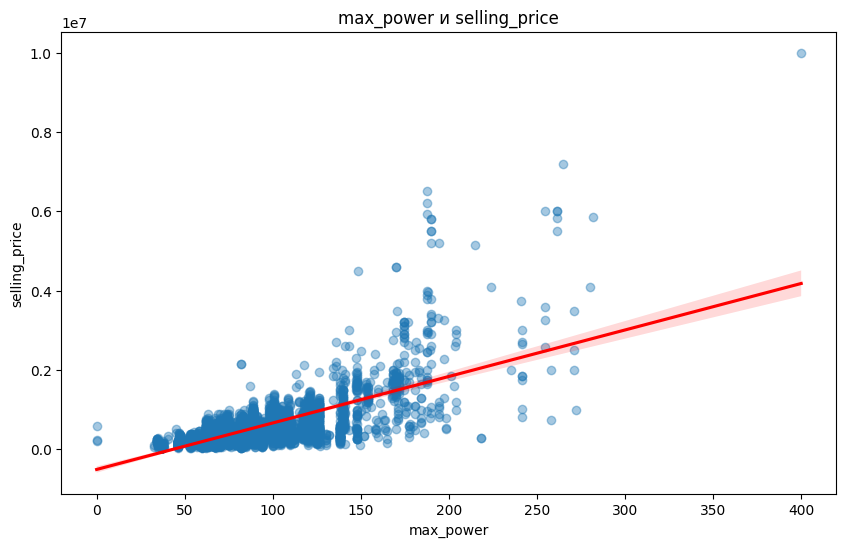

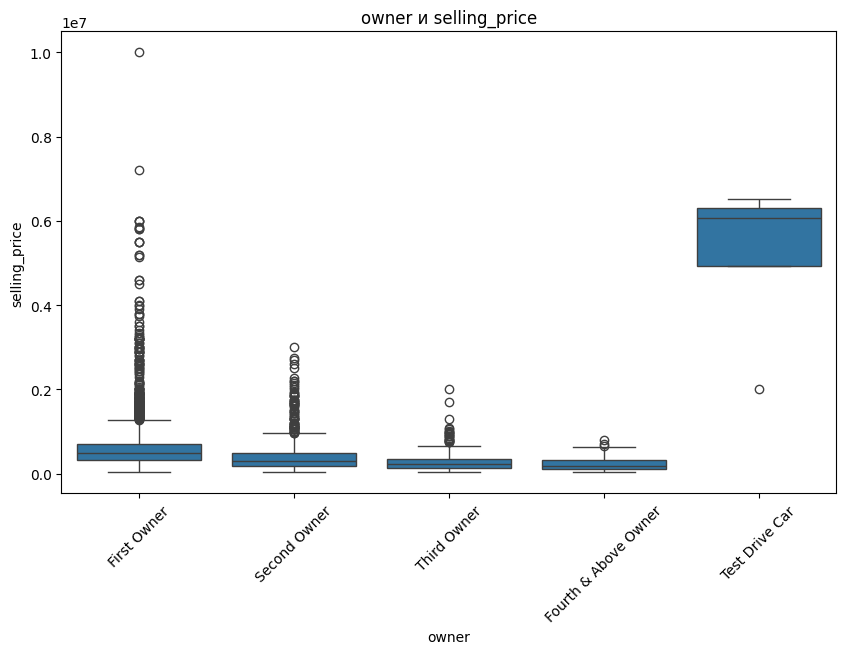

In [148]:
# your code here

# строю регрессионный график зависимости мощности от цены
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_train,
    x='max_power',
    y='selling_price',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}     # линия тренда красная, чтобы было видно
)
plt.title("max_power и selling_price")
plt.show()


# строю boxplot, чтобы посмотреть, как цена зависит от количества владельцев
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x='owner', y='selling_price')
plt.xticks(rotation=45)
plt.title("owner и selling_price")
plt.show()

### Ответ:

Если бы мне нужно было выбрать дополнительные визуализации, я бы в первую очередь построил график зависимости selling_price от max_power. Это одна из самых сильных связей в данных, что видно по корреляции, поэтому именно на неё логично смотреть подробнее. Чтобы лучше увидеть общий тренд, я добавил линию регрессии.

Вторая визуализация это boxplot зависимости selling_price от owner. Среди категориальных признаков именно owner показывает наиболее заметное влияние на таргет, поэтому такой график помогает быстро оценить, как меняется цена в зависимости от количества владельцев.

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [149]:
features = [
    'year',
    'km_driven',
    'mileage',
    'engine',
    'max_power',
    'seats',
    'torque',
    'max_torque_rpm'
]


# создаём копии
df_train_num = df_train[features].copy()
df_test_num  = df_test[features].copy()

X_train = df_train_num
# отделяем целевой признак
y_train = df_train['selling_price'].copy()

X_train.shape

(5840, 8)

- year — год выпуска  
- km_driven — пробег  
- mileage — расход топлива  
- engine — объём двигателя  
- max_power — максимальная мощность  
- seats — количество сидений  
- torque — крутящий момент
- max_torque_rpm — максимальные обороты

In [150]:
y_test  = df_test['selling_price'].copy()
X_test  = df_test_num

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
# обучаем модель
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# предсказания
y_pred_train_lin = model_lr.predict(X_train)
y_pred_test_lin = model_lr.predict(X_test)

# метрики
r2_train = r2_score(y_train, y_pred_train_lin)
r2_test = r2_score(y_test, y_pred_test_lin)

mse_train = MSE(y_train, y_pred_train_lin)
mse_test = MSE(y_test, y_pred_test_lin)

# красивый вывод
print(f"""
Линейная регрессия метрики
------------------------------
R2 train   : {r2_train:.6f}
R2 test    : {r2_test:.6f}
MSE train  : {mse_train:.2f}
MSE test   : {mse_test:.2f}
""")


Линейная регрессия метрики
------------------------------
R2 train   : 0.601128
R2 test    : 0.600739
MSE train  : 114332000615.76
MSE test   : 229506671784.14



### Ответ:

Можно увидеть, что R^2 почти что ничего не отличается у train и test, но при этом MSE у них отличается в 2 раза. Скорее всего это связано с масштабом признака selling_price, потому что если мы вернемся к Заданию 7, то увидим, что там и средняя и медиана у test была больше.

Так что переобучения скорее всего нет.

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [152]:
# функция, которая вручную считает R^2
def r2_manual(real, pred):
    real = np.asarray(real)
    pred = np.asarray(pred)

    avg = np.mean(real)  # это среднее значение по нашему таргету
    err_model = np.sum((real - pred)**2)  # сумма квадратов остатков регрессии
    err_total = np.sum((real - avg)**2)  # общая сумма квадратов

    return 1 - err_model / err_total

# считаем r2 с помощью sklearn и нашей ручной функции
r2_train_lib = r2_score(y_train, y_pred_train_lin)
r2_train_my = r2_manual(y_train, y_pred_train_lin)

r2_test_lib = r2_score(y_test, y_pred_test_lin)
r2_test_my = r2_manual(y_test, y_pred_test_lin)

print(f"""
Сравнение R2 sklearn и вручную
---------------------------------
Trian:
  R2 из sklearn : {r2_train_lib:.6f}
  R2 вручную    : {r2_train_my:.6f}

Test:
  R2 из sklearn : {r2_test_lib:.6f}
  R2 вручную    : {r2_test_my:.6f}
""")



Сравнение R2 sklearn и вручную
---------------------------------
Trian:
  R2 из sklearn : 0.601128
  R2 вручную    : 0.601128

Test:
  R2 из sklearn : 0.600739
  R2 вручную    : 0.600739



### Ответ:

- real — это реальные значения таргета  
- pred — предсказания модели  
- avg — обычное среднее по всему таргету  
- err_model — сумма квадратов остатков (${SS}_{res}$)
- err_total — насколько вообще данные разбросаны вокруг среднего (${SS}_{tot}$)
- итоговая формула такая же, как в классическом определении:

$$
R^2 = 1 - \frac{\text{SS}_{res}}{\text{SS}_{tot}}
$$

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [153]:
# your code here

# функция для вычисления adjusted R² вручную
def adjusted_r2_manual(real, pred, count_features):
    r2 = r2_manual(real, pred)
    n = len(real)
    return 1 - (1 - r2) * ((n - 1) / (n - count_features - 1))


# считаем обычный R^2 (sklearn)
r2_train_lib = r2_score(y_train, y_pred_train_lin)
r2_test_lib = r2_score(y_test, y_pred_test_lin)

# считаем adjusted-R2 вручную через твою функцию
adj_train_my = adjusted_r2_manual(y_train, y_pred_train_lin, X_train.shape[1])
adj_test_my = adjusted_r2_manual(y_test, y_pred_test_lin, X_test.shape[1])

print(f"""
Скорректированный коэффициент детерминации (Adjusted R2)
---------------------------------------------------------

Train:
  Обычный R2           : {r2_train_lib:.6f}
  Скорректированный R2 : {adj_train_my:.6f}

Test:
  Обычный R2           : {r2_test_lib:.6f}
  Скорректированный R2 : {adj_test_my:.6f}
""")


Скорректированный коэффициент детерминации (Adjusted R2)
---------------------------------------------------------

Train:
  Обычный R2           : 0.601128
  Скорректированный R2 : 0.600581

Test:
  Обычный R2           : 0.600739
  Скорректированный R2 : 0.597516



### Ответ:


Основная проблема обычного R^2 в том, что если в модель добавлять новые признаки, то значение метрики почти всегда растёт. Даже если эти признаки вообще никак не связаны с целевой переменной.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [154]:
from sklearn.preprocessing import StandardScaler

# your code here
# создаю стандартизатор
scaler = StandardScaler()
scaler.fit(X_train)

# применяю масштабирование
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# display(X_train)

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [155]:
# your code here

# обучаю вторую линейную регрессию на нормализованных данных
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train, y_train)

# делаю предсказания
y_pred_train_lr2 = model_lr_2.predict(X_train)
y_pred_test_lr2  = model_lr_2.predict(X_test)

# считаю R2
r2_train_lr2 = r2_score(y_train, y_pred_train_lr2)
r2_test_lr2  = r2_score(y_test, y_pred_test_lr2)

# беру коэффициенты модели
coefs = model_lr_2.coef_

# нахожу индекс самого "информативного"
max_coef = np.argmax(np.abs(coefs))

print(f"""
Линейная регрессия (после нормализации), метрики
----------------------------------------------------
R2 train : {r2_train_lr2:.6f}
R2 test  : {r2_test_lr2:.6f}

Наиболее сильный признак: {features[max_coef]}
Значение коэффициента    : {coefs[max_coef]:.6f}

Все коэффициенты:
------------------------------
""") 

for name, coef in zip(features, coefs):
    print(f"{name:<20} | {coef:>12.6f}")



Линейная регрессия (после нормализации), метрики
----------------------------------------------------
R2 train : 0.601128
R2 test  : 0.600739

Наиболее сильный признак: max_power
Значение коэффициента    : 331974.228042

Все коэффициенты:
------------------------------

year                 | 165477.233031
km_driven            | -48730.651493
mileage              | -8183.803615
engine               | 23135.312615
max_power            | 331974.228042
seats                | -29682.823016
torque               |  3217.083536
max_torque_rpm       | -59808.272851


### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [156]:
from sklearn.linear_model import Lasso

# your code here

# обучаю простую Lasso-регрессию
lasso_simple = Lasso()
# lasso = Lasso(alpha=1000)
lasso_simple.fit(X_train, y_train)

# делаю предсказания
y_pred_train_lasso_simple = lasso_simple.predict(X_train)
y_pred_test_lasso_simple = lasso_simple.predict(X_test)

# считаю метрики R2
r2_train_lasso_simple = r2_score(y_train, y_pred_train_lasso_simple)
r2_test_lasso_simple = r2_score(y_test, y_pred_test_lasso_simple)

# сохраняю коэффициенты
coefs_lasso = lasso_simple.coef_
zero_mask = (coefs_lasso == 0)

print(f"""
Lasso-регрессия метрики
--------------------------
R2 train   : {r2_train_lasso_simple:.6f}
R2 test    : {r2_test_lasso_simple:.6f}

""")
print(f"{'Признак':<20} | {'Коэффициент':>12} | {'Занулен?'}")
print("-" * 50)
for name, coef, zero in zip(features, coefs_lasso, zero_mask):
    print(f"{name:<20} | {coef:>12.5f} | {str(zero):>8}")


Lasso-регрессия метрики
--------------------------
R2 train   : 0.601128
R2 test    : 0.600738


Признак              |  Коэффициент | Занулен?
--------------------------------------------------
year                 | 165475.15088 |    False
km_driven            | -48729.71753 |    False
mileage              |  -8180.64711 |    False
engine               |  23133.42295 |    False
max_power            | 331975.47428 |    False
seats                | -29678.98986 |    False
torque               |   3216.46476 |    False
max_torque_rpm       | -59806.22114 |    False


### Ответ:
Lasso у меня ничего не занулил, и это, в принципе, логично.
У нас всего 8 признаков и все они что-то дают модели, поэтому выбрасывать им особо нечего.

Так же стандартный alpha=1.0 и это достаточно слабая регуляризация. Она почти не давит коэффициенты, поэтому они просто уменьшились, но нулей нет.

Ну и после стандартизации признаки стали одного масштаба.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [157]:
# your code here

from sklearn.model_selection import GridSearchCV

# набор коэффициентов регуляризации
param_grid = {
    "alpha": [0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000, 1000000],
    "max_iter": [1000, 5000, 10000]
}

lasso_grid = Lasso()

# запускаю грид-сёрч
grid = GridSearchCV(
    estimator=lasso_grid,
    param_grid=param_grid,
    cv=10,
    scoring="r2",
    n_jobs=-1
)

grid.fit(X_train, y_train)  

# достаю лучшую модель
best_lasso_grid = grid.best_estimator_

# считаю предсказания
y_pred_train_lasso_grid = best_lasso_grid.predict(X_train)
y_pred_test_lasso_grid = best_lasso_grid.predict(X_test)

# вычисляю метрики
r2_train_lasso_grid = r2_score(y_train, y_pred_train_lasso_grid)
r2_test_lasso_grid = r2_score(y_test, y_pred_test_lasso_grid)

# беру коэффициенты и маску зануления
coefs_lasso = best_lasso_grid.coef_
zero_mask = (coefs_lasso == 0)

print(f"""
Лучший Lasso после GridSearchCV
----------------------------------------
Оптимальный alpha            : {grid.best_params_["alpha"]}
Оптимальный max_iter         : {grid.best_params_["max_iter"]}
Лучший R2 на кросс-валидации : {grid.best_score_:.6f}

R2 train                 : {r2_train_lasso_grid:.6f}
R2 test                  : {r2_test_lasso_grid:.6f}

Коэффициенты модели:
""")

print(f"{'Признак':<20} | {'Коэффициент':>12} | {'Занулён?'}")
print("-" * 50)
for name, coef, zero in zip(features, coefs_lasso, zero_mask):
    print(f"{name:<20} | {coef:>12.5f} | {str(zero):>8}")


Лучший Lasso после GridSearchCV
----------------------------------------
Оптимальный alpha            : 10000
Оптимальный max_iter         : 1000
Лучший R2 на кросс-валидации : 0.580742

R2 train                 : 0.598380
R2 test                  : 0.587076

Коэффициенты модели:

Признак              |  Коэффициент | Занулён?
--------------------------------------------------
year                 | 153752.41806 |    False
km_driven            | -39009.47367 |    False
mileage              |      0.00000 |     True
engine               |      0.00000 |     True
max_power            | 337271.25639 |    False
seats                |     -0.00000 |     True
torque               |      0.00000 |     True
max_torque_rpm       | -46091.31032 |    False


### Ответ:

Всего грид-сёрчеру пришлось обучить 10 * 10 * 3 = 300 моделей 

param_grid - в данном примере заполняется:
- alpha, то есть это L1 регуляризация. Чем больше alpha, тем сильнее штрафуются большие веса
- max_iter - сколько шагов мы разрешаем оптимизатору 

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [158]:
# your code here
from sklearn.linear_model import ElasticNet

# подбираем гиперпараметры для ElasticNet
param_grid = {
    "alpha": [0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000, 1000000],
    "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
    "fit_intercept": [True, False]
}

enet_grid = ElasticNet()

# запускаю грид-сёрч по двум параметрам
grid_enet_grid = GridSearchCV(
    estimator=enet_grid,
    param_grid=param_grid,
    cv=10,
    scoring="r2",
    n_jobs=-1
)

# обучаю все комбинации моделей 
grid_enet_grid.fit(X_train, y_train)

# достаю лучшую модель
best_enet_grid = grid_enet_grid.best_estimator_

# предсказания
y_pred_train_enet_grid = best_enet_grid.predict(X_train)
y_pred_test_enet_grid = best_enet_grid.predict(X_test)

# метрики
r2_train_enet = r2_score(y_train, y_pred_train_enet_grid)
r2_test_enet = r2_score(y_test, y_pred_test_enet_grid)

coefs_enet = best_enet_grid.coef_
zero_mask_enet = (coefs_enet == 0)


print(f"""
ElasticNet после GridSearchCV
-----------------------------------------
Оптимальный alpha            : {grid_enet_grid.best_params_['alpha']}
Оптимальный l1_ratio         : {grid_enet_grid.best_params_['l1_ratio']}
Оптимальный fit_intercept    : {grid_enet_grid.best_params_['fit_intercept']}
Лучший R2 на кросс-валидации : {grid_enet_grid.best_score_:.6f}

R2 train           : {r2_train_enet:.6f}
R2 test            : {r2_test_enet:.6f}

Коэффициенты модели:
""")

print(f"{'Признак':<20} | {'Коэффициент':>12} | {'Занулён?'}")
print("-" * 50)
for name, coef, zero in zip(features, coefs_enet, zero_mask_enet):
    print(f"{name:<20} | {coef:>12.5f} | {str(zero):>8}")


ElasticNet после GridSearchCV
-----------------------------------------
Оптимальный alpha            : 10000
Оптимальный l1_ratio         : 1.0
Оптимальный fit_intercept    : True
Лучший R2 на кросс-валидации : 0.580742

R2 train           : 0.598380
R2 test            : 0.587076

Коэффициенты модели:

Признак              |  Коэффициент | Занулён?
--------------------------------------------------
year                 | 153752.41806 |    False
km_driven            | -39009.47367 |    False
mileage              |      0.00000 |     True
engine               |      0.00000 |     True
max_power            | 337271.25639 |    False
seats                |     -0.00000 |     True
torque               |      0.00000 |     True
max_torque_rpm       | -46091.31032 |    False


### Ответ:

Всего грид-сёрчеру пришлось обучить 10 * 10 * 6 * 2 = 1200 моделей 

param_grid - в данном примере заполняется:
- alpha — это насколько сильно мы "зажимаем" модель, чтобы она не переобучилась.
- l1_ratio — это баланс между L1 и L2 регуляризацией.
- fit_intercept - это строим константу-сдвиг или нет

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [159]:
# простая функция для L0 регуляризации
# идея такая: обучаем обычную линейную регрессию,
# а потом вручную зануляем маленькие коэффициенты
def l0_regression_with_scores(X_train, y_train, X_test, y_test, lambda_l0):
    
    # обучаю обычную линейную модель
    model = LinearRegression().fit(X_train, y_train)

    # копирую коэффициенты, чтобы не трогать модель
    coefs = model.coef_.copy()
    intercept = model.intercept_

    # всё, что по модулю меньше порога - зануляем
    zero_mask = np.abs(coefs) < lambda_l0
    coefs[zero_mask] = 0

    # делаю расширенные матрицы, чтобы считать предсказания одним умножением
    X_train_ext = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_test_ext  = np.hstack([X_test,  np.ones((X_test.shape[0], 1))])
    weights = np.append(coefs, intercept)

    y_pred_train = X_train_ext @ weights
    y_pred_test  = X_test_ext  @ weights

    # метрики на train и test
    r2_train = r2_score(y_train, y_pred_train)
    r2_test  = r2_score(y_test, y_pred_test)

    return {
        "coefs": coefs,
        "zero_mask": zero_mask,
        "r2_train": r2_train,
        "r2_test": r2_test,
        "y_pred_train": y_pred_train,
        "y_pred_test": y_pred_test,
        "intersept": intercept
    }

# запускаю метод
result = l0_regression_with_scores(
    X_train, y_train,
    X_test, y_test,
    lambda_l0=50000   # порог для зануления
)

y_pred_test_l0 = result["y_pred_test"]
print(f"""
Результаты "L0-регуляризации"
-----------------------------
R2 train : {result['r2_train']:.6f}
R2 test  : {result['r2_test']:.6f}

Коэффициенты модели:
""")
print(f"{'Признак':<20} | {'Коэффициент':>12} | {'Занулён?'}")
print("-" * 50)
for name, coef, zero in zip(features, result["coefs"], result["zero_mask"]):
    print(f"{name:<20} | {coef:>12.2f} | {str(zero):>5}")


Результаты "L0-регуляризации"
-----------------------------
R2 train : 0.591118
R2 test  : 0.573737

Коэффициенты модели:

Признак              |  Коэффициент | Занулён?
--------------------------------------------------
year                 |    165477.23 | False
km_driven            |         0.00 |  True
mileage              |         0.00 |  True
engine               |         0.00 |  True
max_power            |    331974.23 | False
seats                |         0.00 |  True
torque               |         0.00 |  True
max_torque_rpm       |    -59808.27 | False


# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [160]:
# display(df_train.loc[df_train['name'].str.len().idxmin()])

# словарь для определения типа кузова по ключевым словам в названии
body_type_dict = {
    "sedan": "sedan", "sd": "sedan", "saloon": "sedan", "classic": "sedan",
    "hatchback": "hatchback", "hatch": "hatchback", "hb": "hatchback", 
    "back": "hatchback", "sportback": "hatchback", "3dr": "hatchback", "5dr": "hatchback",
    "wagon": "wagon", "estate": "wagon", "touring": "wagon", "tourer": "wagon",
    "sw": "wagon", "kombi": "wagon", "combi": "wagon", "variant": "wagon",
    "suv": "suv", "crossover": "suv", "cross": "suv", "4x4": "suv",
    "4wd": "suv", "awd": "suv", "jeep": "suv", "x": "suv",
    "coupe": "coupe", "coupé": "coupe", "cp": "coupe", "sport coupe": "coupe",
    "convertible": "convertible", "cabriolet": "convertible", "cabrio": "convertible",
    "roadster": "convertible", "spider": "convertible", "spyder": "convertible",
    "targa": "convertible", "barchetta": "convertible",
    "pickup": "pickup", "pick-up": "pickup", "truck": "pickup",
    "double cab": "pickup", "single cab": "pickup", "dc": "pickup",
    "sc": "pickup", "ute": "pickup",
    "mpv": "mpv", "minivan": "mpv", "van": "mpv", "touran": "mpv", "grand": "mpv",
    "liftback": "liftback", "fastback": "liftback", "gran coupe": "liftback",
    "micro": "micro", "kei": "micro", "keicar": "micro", "city": "micro",
    "panel van": "commercial", "cargo": "commercial", "delivery": "commercial",
    "commercial": "commercial", "cv": "commercial",
    "notchback": "notchback", "shooting brake": "shooting_brake",
    "landaulet": "landaulet", "phaeton": "phaeton",
    "limousine": "limousine", "brake": "shooting_brake"
}

# словарь для извлечения типа трансмиссии из названия
transmission_map = {
    "AT": "AT", "A/T": "AT", "AUTOMATIC": "AT",
    "AMT": "AMT",
    "MT": "MT", "M/T": "MT", "MANUAL": "MT",
    "CVT": "CVT",
    "DCT": "DCT",
    "DSG": "DSG"
}

# список известных уровней комплектации
trim_levels = {
    "LXI", "VXI", "ZXI", "ZDI", "VDI", "LSI", "LDI", "GLS", "GXI",
    "VLS", "DLX", "CLX", "SXI", "LXi", "Vxi", "Zxi", "Zdi", "Vdi",
    "Sportz", "Classic", "Ambition", "Elegance", "Trend", "Style",
    "Dynamic", "Premium", "Exclusive", "Base", "Plus", "Optional"
}

# функция для извлечения типа трансмиссии из названия автомобиля
def extract_transmission(text, transmission_map):
    words = text.upper().split()
    for w in words:
        if w in transmission_map:
            return transmission_map[w]
    return "unknown"

# функция для извлечения объёма двигателя
def extract_engine_volume(text):
    match = re.search(r"(\d\.\d)\s*L", text.upper())
    if match:
        return float(match.group(1))
    
    match = re.search(r"(\d\.\d)", text)
    if match:
        return float(match.group(1))

    match = re.search(r"(\d)\s*L", text.upper())
    if match:
        return float(match.group(1))
    
    return "unknow"

# функция для определения комплектации
def extract_trim(text, trim_levels):
    words = text.replace("-", " ").split()
    for w in words:
        if w.strip() in trim_levels:
            return w.strip()
    return "unknown"

# функция для определения типа кузова
def extract_body_type(name, mapping):
    name = str(name).lower().split()
    for word in name:
        if word in mapping:
            return mapping[word]
    return "unknown"

# достаю марку и модель как первые два слова из названия
df_train['mark'] = df_train['name'].str.split(' ').str[0]
df_train['model'] = df_train['name'].str.split(' ').str[1]

# применяю все написанные функции к train
df_train["body_type"] = df_train["name"].apply(lambda x: extract_body_type(x, body_type_dict))
df_train["parsed_transmission"] = df_train["name"].apply(lambda x: extract_transmission(x, transmission_map))
df_train["parsed_engine_volume"] = df_train["name"].apply(extract_engine_volume)
df_train["parsed_trim"] = df_train["name"].apply(lambda x: extract_trim(x, trim_levels))

# аналогично у test
df_test['mark'] = df_test['name'].str.split(' ').str[0]
df_test['model'] = df_test['name'].str.split(' ').str[1]
df_test["body_type"] = df_test["name"].apply(lambda x: extract_body_type(x, body_type_dict))
df_test["parsed_transmission"] = df_test["name"].apply(lambda x: extract_transmission(x, transmission_map))
df_test["parsed_engine_volume"] = df_test["name"].apply(extract_engine_volume)
df_test["parsed_trim"] = df_test["name"].apply(lambda x: extract_trim(x, trim_levels))


# раньше использовалось, чтобы составить множество
# из всех слов в name, чтобы потом составить новые колонки

# unique_words = set()

# df_train['name'].astype(str).str.split().apply(unique_words.update)
# print(unique_words)

# df_train[df_train["parsed_transmission"] != "unknown"].head(20)

In [161]:
cat_feature = [
    "fuel",
    "seller_type",
    "transmission",
    "owner",
    "seats",
    "mark",
    "model",
    "body_type",
    "parsed_transmission",
    "parsed_engine_volume",
    "parsed_trim",
]

X_train_cat = df_train[cat_feature].copy()
y_train_cat = df_train['selling_price'].copy()

X_test_cat = df_test[cat_feature].copy()
y_test_cat = df_test['selling_price'].copy()

X_train_cat["seats"] = X_train_cat["seats"].astype(str)
X_test_cat["seats"] = X_test_cat["seats"].astype(str)

display(X_test_cat.head())

,fuel,seller_type,transmission,owner,seats,mark,model,body_type,parsed_transmission,parsed_engine_volume,parsed_trim
0,Diesel,Individual,Manual,First Owner,7,Mahindra,Xylo,unknown,unknown,unknow,unknown
1,Diesel,Individual,Manual,First Owner,5,Tata,Nexon,unknown,unknown,1.5,unknown
2,Petrol,Individual,Automatic,First Owner,5,Honda,Civic,unknown,AT,1.8,unknown
3,Diesel,Individual,Manual,First Owner,5,Honda,City,micro,unknown,unknow,unknown
4,Petrol,Individual,Manual,Second Owner,5,Tata,Indica,unknown,unknown,1.2,unknown


In [162]:
assert X_train_cat.shape == (5840, 11)

In [163]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,seats,mark,model,body_type,parsed_transmission,parsed_engine_volume,parsed_trim
count,5840,5840,5840,5840,5840,5840,5840,5840,5840,5840,5840
unique,4,3,2,5,9,30,202,8,7,22,29
top,Diesel,Individual,Manual,First Owner,5,Maruti,Swift,unknown,unknown,unknow,unknown
freq,3177,5223,5336,3603,4618,1804,558,5181,5347,3903,3894


### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [164]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here
X_train_cat = X_train_cat.copy()
X_test_cat = X_test_cat.copy()

# привожу все категориальные признаки к строкам
for col in cat_feature:
    X_train_cat[col] = X_train_cat[col].astype(str)
    X_test_cat[col] = X_test_cat[col].astype(str)

# создаю OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_cat_ohe = encoder.fit_transform(X_train_cat)
X_test_cat_ohe = encoder.transform(X_test_cat)

# числовые признаки использую как есть
X_train_num = X_train
X_test_num  = X_test

# склеиваю числовые и OHE-кодированные данные в один массив
X_train_final = np.hstack([X_train_num, X_train_cat_ohe])
X_test_final  = np.hstack([X_test_num, X_test_cat_ohe])
# display(X_train_final)

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

### Ответ:
Работать с ОНЕ нужно так: сначала кодируем категории только на train, а потом тем же энкодером преобразуем test, чтобы не было расхождений по столбцам

Один столбец после OHE всегда удаляют, потому что иначе появляется лишняя линейная зависимость между колонками и модель начинает некорректно работать.

Если после обучения какие-то столбцы показали, что у них почти нулевые веса, то их можно удалить, но очень аккуратно. Ведь мы удаляем тогда и категорию, а значит и уменьшеаем количество информации.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [165]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

param_grid_ridge = {
    "alpha": [0.1, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
}

ridge = Ridge()

# настраиваю GridSearchCV 
grid_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    cv=10,
    scoring="r2",
    n_jobs=-1
)
# обучаю подбор параметров
grid_ridge.fit(X_train_final, y_train_cat)

# беру лучшую модель
best_ridge = grid_ridge.best_estimator_

# делаю предсказания
y_pred_train_ridge = best_ridge.predict(X_train_final)
y_pred_test_ridge = best_ridge.predict(X_test_final)

# считаю метрики
r2_train_ridge = r2_score(y_train_cat, y_pred_train_ridge)
r2_test_ridge  = r2_score(y_test_cat, y_pred_test_ridge)

print(f"""
Ridge после GridSearchCV
------------------------------
Оптимальный alpha            : {grid_ridge.best_params_["alpha"]}
Лучший R2 на кросс-валидации : {grid_ridge.best_score_:.6f}

R2 train                : {r2_train_ridge:.6f}
R2 test                 : {r2_test_ridge:.6f}

""")

print(f"{'Признак':<20} | {'Коэффициент':>12}")
print("-" * 35)
for name, coef in zip(range(len(best_ridge.coef_)), best_ridge.coef_):
    print(f"{str(name):<20} | {coef:>12.6f}")


Ridge после GridSearchCV
------------------------------
Оптимальный alpha            : 1
Лучший R2 на кросс-валидации : 0.794039

R2 train                : 0.897404
R2 test                 : 0.923048


Признак              |  Коэффициент
-----------------------------------
0                    | 165185.412219
1                    | -21766.977028
2                    | 35071.810509
3                    | -24535.432690
4                    | 216652.661979
5                    | -20582.218743
6                    |  4775.000493
7                    | -13917.294359
8                    | -75904.012848
9                    | 19798.637432
10                   | 59612.938916
11                   | -3507.563499
12                   | 17715.549407
13                   | -15118.699124
14                   | -2596.850282
15                   | 117481.975813
16                   | -117481.975813
17                   | -405398.251676
18                   | -433726.207202
19                   | -45

### Ответ:

Да, качество улучшилось значительно :)
Можно даже сравнить:

ElasticNet на числовых признаках:

R2 train = 0.597726

R2 test  = 0.586752

Лучший R2 по CV = 0.580302

Ridge на всех данных с OHE:

R2 train = 0.897154

R2 test  = 0.923108

Лучший R2 по CV = 0.793712

Ridge-регрессия работает лучше, потому что она сглаживает веса, но не зануляет признаки. И плюс мы еще добавили новых данных и поэтому с категориальными данными у нас предсказания улучшились сильно.

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [166]:
# your code here
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

# возраст машины = 2020 - год выпуска
df_train_copy['age'] = 2020 - df_train_copy['year']
df_test_copy['age'] = 2020 - df_test_copy['year']

# добавляю квадраты возраста 
df_train_copy['age_sq'] = df_train_copy['age'] ** 2
df_test_copy['age_sq'] = df_test_copy['age'] ** 2

# бинарный признак: много владельцев или нет
df_train_copy['many_owners'] = (df_train_copy['owner'].isin(['3rd Owner', '4th & Above Owner'])).astype(int)
df_test_copy['many_owners'] = (df_test_copy['owner'].isin(['3rd Owner', '4th & Above Owner'])).astype(int)

# логарифм таргета, чтобы сгладить распределение
df_train_copy['log_price'] = np.log1p(df_train_copy['selling_price'])
df_test_copy['log_price'] = np.log1p(df_test_copy['selling_price'])

# произведение мощности и объёма — новый составной признак
df_train_copy['power_engine'] = df_train_copy['max_power'] * df_train_copy['engine']
df_test_copy['power_engine'] = df_test_copy['max_power'] * df_test_copy['engine']

# мощность умножаю на возраст — тоже взаимодействие признаков
df_train_copy['power_age'] = df_train_copy['max_power'] * df_train_copy['age']
df_test_copy['power_age'] = df_test_copy['max_power'] * df_test_copy['age']

# seats в числовом формате
df_train_copy["seat_int"] = df_train_copy["seats"].astype(int)
df_test_copy["seat_int"]  = df_test_copy["seats"].astype(int)

# и тот же seats, но как строка — для OHE
df_train_copy["seat_obj"] = df_train_copy["seats"].astype(str)
df_test_copy["seat_obj"]  = df_test_copy["seats"].astype(str)

# удаляю старый таргет, он уже залогарифмирован
df_train_copy = df_train_copy.drop(columns=["selling_price"])
df_test_copy  = df_test_copy.drop(columns=["selling_price"])

# убираю оригинальный seats, он теперь в двух форматах
df_train_copy = df_train_copy.drop(columns=["seats"])
df_test_copy  = df_test_copy.drop(columns=["seats"])

# удаляю name — он уже разобран на части раньше
df_train_copy = df_train_copy.drop(columns=["name"])
df_test_copy  = df_test_copy.drop(columns=["name"])

# display(df_train_copy.head())
# display(df_test_copy.head())

In [167]:
types = {
    "numeric_integer": [],
    "numeric_float": [],
    "binary": [],
    "categorical": [],
    "datetime": [],
    "text": []
}

for col in df_train_copy.columns:
    col_data = df_train_copy[col]
    col_type = col_data.dtype

    if is_integer_dtype(col_data):
      types["numeric_integer"].append(col)

    if is_float_dtype(col_data):
      types["numeric_float"].append(col)

    if is_bool_dtype(col_data):
      types["binary"].append(col)

    if is_object_dtype(col_data):
      types["text"].append(col)

    if is_datetime64_any_dtype(col_data):
      types["datetime"].append(col)

num_cols_bonus = (
    types["numeric_integer"] + types["numeric_float"]
)

print("Статистика по числовым данным для df_train_copy")
display(get_num_stat(df_train_copy, num_cols_bonus))
print("Статистика по числовым данным для df_test_copy")
display(get_num_stat(df_test_copy, num_cols_bonus))

print("Статистика по текстовым данным для df_train_copy")
display(get_text_stat(df_train_copy, types['text']))
print("Статистика по текстовым данным для df_test_copy")
display(get_text_stat(df_test_copy, types['text']))

print(types)

Статистика по числовым данным для df_train_copy


,count,mean,std,min,25%,50%,75%,max,idmax,idmin,IQR,skew,kurtosis,missing_abs,missing_pct,is_outlier_max,is_outlier_min
year,5840.0,2013.428425,4.095622,1983.000000,2011.00000,2014.000000,2017.000000,2.020000e+03,96,274,6.000000,-1.019470,1.692979,0,0.0,False,True
km_driven,5840.0,73952.242466,60071.136504,1.000000,39000.00000,70000.000000,100000.000000,2.360457e+06,2680,5683,61000.000000,12.645506,416.024644,0,0.0,True,False
engine,5840.0,1429.448973,485.662834,624.000000,1197.00000,1248.000000,1498.000000,3.604000e+03,1208,315,301.000000,1.266954,1.120626,0,0.0,True,True
age,5840.0,6.571575,4.095622,0.000000,3.00000,6.000000,9.000000,3.700000e+01,274,96,6.000000,1.019470,1.692979,0,0.0,True,False
age_sq,5840.0,59.956849,76.001552,0.000000,9.00000,36.000000,81.000000,1.369000e+03,274,96,72.000000,3.594199,26.916178,0,0.0,True,False
many_owners,5840.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0,0,0.000000,0.000000,0.000000,0,0.0,False,False
seat_int,5840.0,5.426712,0.982344,2.000000,5.00000,5.000000,5.000000,1.400000e+01,3330,4305,0.000000,2.009875,4.079385,0,0.0,True,True
mileage,5840.0,19.430841,3.985973,0.000000,16.95000,19.370000,22.300000,4.200000e+01,151,533,5.350000,-0.175057,0.872092,0,0.0,True,True
max_power,5840.0,87.906371,31.640418,0.000000,68.00000,81.860000,99.000000,4.000000e+02,151,476,31.000000,1.799694,6.046694,0,0.0,True,True
torque,5840.0,175.930478,116.757608,47.071920,111.80000,160.000000,200.055660,3.726527e+03,633,4284,88.255660,8.660037,181.349999,0,0.0,True,False


Статистика по числовым данным для df_test_copy


,count,mean,std,min,25%,50%,75%,max,idmax,idmin,IQR,skew,kurtosis,missing_abs,missing_pct,is_outlier_max,is_outlier_min
year,1000.0,2013.681000,4.012149,1995.000000,2011.00000,2014.000000,2017.000000,2.020000e+03,442,116,6.000000,-1.022356,1.215884,0,0.0,False,True
km_driven,1000.0,71393.341000,48486.218662,1303.000000,37000.00000,61500.000000,100000.000000,3.750000e+05,207,825,63000.000000,1.422857,3.833756,0,0.0,True,False
engine,1000.0,1454.876000,521.995740,624.000000,1197.00000,1248.000000,1582.000000,3.604000e+03,15,23,385.000000,1.189063,0.900976,0,0.0,True,False
age,1000.0,6.319000,4.012149,0.000000,3.00000,6.000000,9.000000,2.500000e+01,116,442,6.000000,1.022356,1.215884,0,0.0,True,False
age_sq,1000.0,56.011000,71.175929,0.000000,9.00000,36.000000,81.000000,6.250000e+02,116,442,72.000000,2.810868,11.217211,0,0.0,True,False
many_owners,1000.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0,0,0.000000,0.000000,0.000000,0,0.0,False,False
seat_int,1000.0,5.403000,0.912921,4.000000,5.00000,5.000000,5.000000,9.000000e+00,199,23,0.000000,1.672815,1.890972,0,0.0,True,True
mileage,1000.0,19.338810,3.951750,0.000000,16.55000,19.370000,22.300000,3.226000e+01,195,130,5.750000,-0.110715,0.003407,0,0.0,True,True
max_power,1000.0,90.841670,34.893389,34.200000,69.00000,82.425000,102.000000,2.800000e+02,15,542,33.000000,1.594136,3.725303,0,0.0,True,False
torque,1000.0,177.617377,103.734516,48.000000,111.70000,160.000000,205.000000,1.421964e+03,108,405,93.300000,3.672984,33.266970,0,0.0,True,False


Статистика по текстовым данным для df_train_copy


,mean_len,median_len,max_len,missing_pct,unique_cnt
fuel,5.956849,6.0,6.0,0.0,4.0
seller_type,9.620205,10.0,16.0,0.0,3.0
transmission,6.258904,6.0,9.0,0.0,2.0
owner,11.498459,11.0,20.0,0.0,5.0
mark,6.270548,6.0,13.0,0.0,30.0
model,4.878938,5.0,11.0,0.0,202.0
body_type,6.692979,7.0,10.0,0.0,8.0
parsed_transmission,6.598630,7.0,7.0,0.0,7.0
parsed_engine_volume,5.004966,6.0,6.0,0.0,22.0
parsed_trim,5.947260,7.0,9.0,0.0,29.0


Статистика по текстовым данным для df_test_copy


,mean_len,median_len,max_len,missing_pct,unique_cnt
fuel,5.973,6.0,6.0,0.0,4.0
seller_type,9.628,10.0,16.0,0.0,3.0
transmission,6.369,6.0,9.0,0.0,2.0
owner,11.524,11.0,20.0,0.0,5.0
mark,6.150,6.0,13.0,0.0,25.0
model,4.871,5.0,9.0,0.0,132.0
body_type,6.696,7.0,9.0,0.0,7.0
parsed_transmission,6.545,7.0,7.0,0.0,6.0
parsed_engine_volume,4.974,6.0,6.0,0.0,21.0
parsed_trim,6.021,7.0,8.0,0.0,21.0


{'numeric_integer': ['year', 'km_driven', 'engine', 'age', 'age_sq', 'many_owners', 'seat_int'], 'numeric_float': ['mileage', 'max_power', 'torque', 'max_torque_rpm', 'log_price', 'power_engine', 'power_age'], 'binary': [], 'categorical': [], 'datetime': [], 'text': ['fuel', 'seller_type', 'transmission', 'owner', 'mark', 'model', 'body_type', 'parsed_transmission', 'parsed_engine_volume', 'parsed_trim', 'seat_obj']}


In [168]:
# убираю логарифм цены из списка числовых признаков 
num_cols_bonus = [c for c in num_cols_bonus if c != "log_price"]

# выделяю числовые признаки
X_train_num_bonus = df_train_copy[num_cols_bonus]
X_test_num_bonus = df_test_copy[num_cols_bonus]

# список признаков, которые будут кодироваться TargetEncoder
# дальше не стал использовать, так как получился результат не очень
cat_col_te_bonus = [
    "mark",
    "model",
    "parsed_engine_volume",
    "parsed_trim"
]

X_train_te_bonus = df_train_copy[cat_col_te_bonus]
X_test_te_bonus = df_test_copy[cat_col_te_bonus]

# список признаков для OHE (категориальные + часть TE признаков)
cat_col_ohe_bonus = ['fuel', 'seller_type', 'transmission', 'owner', 'body_type', 'parsed_transmission', 'seat_obj']
cat_col_ohe_bonus += cat_col_te_bonus

# выбираю колонки под OHE
X_train_ohe_bonus = df_train_copy[cat_col_ohe_bonus]
X_test_ohe_bonus = df_test_copy[cat_col_ohe_bonus]

# целевая переменная — логарифм цены
y_train_bonus = df_train_copy['log_price']
y_test_bonus = df_test_copy['log_price']

In [169]:
# блок кода для TargetEncoder я закомментировал
# раньше я пробовал кодировать признаки mark/model/engine_volume/trim через TE,
# но эксперимент показал, что качество модели после TE стало хуже,
# поэтому этот способ временно не использую

# !pip install category_encoders

# from category_encoders import TargetEncoder

# te = TargetEncoder(cols=cat_col_te_bonus)

# te.fit(X_train_te_bonus[cat_col_te_bonus], y_train_bonus)

# X_train_te_bonus = te.transform(X_train_te_bonus)
# X_test_te_bonus  = te.transform(X_test_te_bonus)

# display(X_train_te_bonus)

In [170]:
# привожу все OHE признаки к строковому формату
for col in cat_col_ohe_bonus:
    X_train_ohe_bonus.loc[:, col] = X_train_ohe_bonus[col].astype(str)
    X_test_ohe_bonus.loc[:, col]  = X_test_ohe_bonus[col].astype(str)

# создаю OHE энкодер
encoder_bonus = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# обучаю энкодер на train
X_train_ohe_cat = encoder_bonus.fit_transform(X_train_ohe_bonus[cat_col_ohe_bonus])

# то же самое для test
X_test_ohe_cat  = encoder_bonus.transform(X_test_ohe_bonus[cat_col_ohe_bonus])

# получаю имена всех созданных OHE признаков
ohe_cols = encoder_bonus.get_feature_names_out(cat_col_ohe_bonus)

# превращаю OHE матрицы в нормальные датафреймы
X_train_ohe_df = pd.DataFrame(X_train_ohe_cat, columns=ohe_cols, index=X_train_ohe_bonus.index)
X_test_ohe_df  = pd.DataFrame(X_test_ohe_cat, columns=ohe_cols, index=X_test_ohe_bonus.index)

In [171]:
# исходный вариант с TargetEncoder — отключён
# X_train_full_bonus = pd.concat(
#     [X_train_num_bonus, X_train_te_bonus, X_train_ohe_df],
#     axis=1
# )

# X_test_full_bonus = pd.concat(
#     [X_test_num_bonus, X_test_te_bonus, X_test_ohe_df],
#     axis=1
# )

# собираю финальный train: числовые признаки + OHE
X_train_full_bonus = pd.concat(
    [X_train_num_bonus, X_train_ohe_df],
    axis=1
)

# собираю финальный test: те же два блока
X_test_full_bonus = pd.concat(
    [X_test_num_bonus,X_test_ohe_df],
    axis=1
)

In [172]:
# вытаскиваю имена OHE колонок
ohe_cols_bonus = X_train_ohe_df.columns.tolist()

# выбираю те признаки, всё кроме OHE
cols_to_scale_bonus = [c for c in X_train_full_bonus.columns if c not in ohe_cols_bonus]

# скейлер для числовых данных
scaler_bonus = StandardScaler()

# копирую, чтобы не портить исходные данные
X_train_final_bonus = X_train_full_bonus.copy()
X_test_final_bonus  = X_test_full_bonus.copy()

# скейлю только выбранные числовые столбцы
X_train_final_bonus[cols_to_scale_bonus] = scaler_bonus.fit_transform(X_train_full_bonus[cols_to_scale_bonus])
X_test_final_bonus[cols_to_scale_bonus] = scaler_bonus.transform(X_test_full_bonus[cols_to_scale_bonus])

display(X_train_final_bonus.head())

,year,km_driven,engine,age,age_sq,many_owners,seat_int,mileage,max_power,torque,...,parsed_trim_VDI,parsed_trim_VLS,parsed_trim_VXI,parsed_trim_Vdi,parsed_trim_Vxi,parsed_trim_ZDI,parsed_trim_ZXI,parsed_trim_Zdi,parsed_trim_Zxi,parsed_trim_unknown
0,0.139570,1.191152,-0.373643,-0.139570,-0.315242,0.0,-0.434419,0.995867,-0.439550,0.120512,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.139570,0.766619,0.141162,-0.139570,-0.315242,0.0,-0.434419,0.428830,0.493513,0.634441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.837167,0.883158,-0.068879,0.837167,0.526918,0.0,-0.434419,0.895506,0.066175,0.374641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.569719,0.766619,-0.270682,1.569719,1.434872,0.0,-0.434419,-0.835712,0.009281,-0.540945,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.872122,-0.482007,-0.478663,-0.872122,-0.670529,0.0,-0.434419,0.177929,-0.191113,-0.532606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

param_grid_ridge = {
    "alpha": [0.01, 0.05, 0.1, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
}

ridge_bonus = Ridge()

grid_ridge_bonus = GridSearchCV(
    estimator=ridge_bonus,
    param_grid=param_grid_ridge,
    cv=10,
    scoring="r2",
    n_jobs=-1
)


grid_ridge_bonus.fit(X_train_final_bonus, y_train_bonus)
best_ridge_bonus = grid_ridge_bonus.best_estimator_

y_pred_train_bonus = best_ridge_bonus.predict(X_train_final_bonus)
y_pred_test_bonus = best_ridge_bonus.predict(X_test_final_bonus)

y_pred_train_bonus_real = np.expm1(y_pred_train_bonus)
y_pred_test_bonus_real  = np.expm1(y_pred_test_bonus)
# считаю метрики
r2_train_ridge = r2_score(y_train_bonus, y_pred_train_bonus)
r2_test_ridge  = r2_score(y_test_bonus, y_pred_test_bonus)

print(f"""
Ridge моей обработки
---------------------------------------
Оптимальный alpha            : {grid_ridge_bonus.best_params_["alpha"]}
Лучший R2 на кросс-валидации : {grid_ridge_bonus.best_score_:.6f}

R2 train                : {r2_train_ridge:.6f}
R2 test                 : {r2_test_ridge:.6f}

""")

# print(f"{'Признак':<20} | {'Коэффициент':>12}")
# print("-" * 35)
# for name, coef in zip(range(len(best_ridge_bonus.coef_)), best_ridge_bonus.coef_):
#     print(f"{str(name):<20} | {coef:>12.6f}")


Ridge моей обработки
---------------------------------------
Оптимальный alpha            : 1
Лучший R2 на кросс-валидации : 0.917357

R2 train                : 0.930989
R2 test                 : 0.946049




# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [174]:
# простая бизнес-метрика:
# считаю долю предсказаний, которые ошиблись не больше чем на threshold*100%
def business_metric(y_true, y_pred, threshold=0.1):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    # считаю относительную ошибку
    rel_err = np.abs(y_pred - y_true) / y_true

    # метка успешного прогноза
    ok = rel_err <= threshold

    return ok.mean()


# считаю метрики для всех моделей
bm_lin          = business_metric(y_test_cat, y_pred_test_lin)
bm_lr2          = business_metric(y_test_cat, y_pred_test_lr2)
bm_lasso_simple = business_metric(y_test_cat, y_pred_test_lasso_simple)
bm_lasso_grid   = business_metric(y_test_cat, y_pred_test_lasso_grid)
bm_enet_grid    = business_metric(y_test_cat, y_pred_test_enet_grid)
bm_ridge        = business_metric(y_test_cat, y_pred_test_ridge)
bm_l0           = business_metric(y_test_cat, y_pred_test_l0)
bm_bonus        = business_metric(y_test_cat, y_pred_test_bonus_real)

print(f"{'Модель':<30} | {'Business Metric':>15}")
print("-" * 50)

print(f"{'Линейная регрессия':<30} | {bm_lin:>15.4f}")
print(f"{'Линейная регрессия (нормализ.)':<30} | {bm_lr2:>15.4f}")
print(f"{'Lasso простая':<30} | {bm_lasso_simple:>15.4f}")
print(f"{'Lasso (GridSearch)':<30} | {bm_lasso_grid:>15.4f}")
print(f"{'ElasticNet (GridSearch)':<30} | {bm_enet_grid:>15.4f}")
print(f"{'Ridge (GridSearch)':<30} | {bm_ridge:>15.4f}")
print(f"{'L0-regression':<30} | {bm_l0:>15.4f}")
print(f"{'Моя модель':<30} | {bm_bonus:>15.4f}")

Модель                         | Business Metric
--------------------------------------------------
Линейная регрессия             |          0.2420
Линейная регрессия (нормализ.) |          0.2420
Lasso простая                  |          0.2420
Lasso (GridSearch)             |          0.2430
ElasticNet (GridSearch)        |          0.2430
Ridge (GridSearch)             |          0.3400
L0-regression                  |          0.2340
Моя модель                     |          0.4800


### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [175]:
# считает, в какой доле случаев модель ошиблась больше чем на threshold
def my_business_metrics(y_true, y_pred, threshold=0.30):
    # перевожу всё в numpy — так удобнее считать
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    # относительная ошибка |y_pred - y_true| / y_true
    rel_err = np.abs(y_pred - y_true) / y_true

    # помечаю те случаи, где ошибка > threshold
    hard_miss = rel_err > threshold

    return hard_miss.mean()

# считаю все метрики
my_bm_lin        = my_business_metrics(y_test_cat, y_pred_test_lin)
my_bm_lr2        = my_business_metrics(y_test_cat, y_pred_test_lr2)
my_bm_lasso_simple     = my_business_metrics(y_test_cat, y_pred_test_lasso_simple)
my_bm_lasso_grid      = my_business_metrics(y_test_cat, y_pred_test_lasso_grid)
my_bm_enet_grid       = my_business_metrics(y_test_cat, y_pred_test_enet_grid)
my_bm_ridge      = my_business_metrics(y_test_cat, y_pred_test_ridge)
my_bm_l0         = my_business_metrics(y_test_cat, y_pred_test_l0)
my_bm_bonus      = my_business_metrics(y_test_cat, y_pred_test_bonus_real)


# красивый вывод
print(f"{'Модель':<30} | {'My Business Metric':>15}")
print("-" * 50)

print(f"{'Линейная регрессия':<30} | {my_bm_lin:>15.4f}")
print(f"{'Линейная регрессия (нормализ.)':<30} | {my_bm_lr2:>15.4f}")
print(f"{'Lasso простая':<30} | {my_bm_lasso_simple:>15.4f}")
print(f"{'Lasso (GridSearch)':<30} | {my_bm_lasso_grid:>15.4f}")
print(f"{'ElasticNet (GridSearch)':<30} | {my_bm_enet_grid:>15.4f}")
print(f"{'Ridge (GridSearch)':<30} | {my_bm_ridge:>15.4f}")
print(f"{'L0-regression':<30} | {my_bm_l0:>15.4f}")
print(f"{'Моя модель':<30} | {my_bm_bonus:>15.4f}")

Модель                         | My Business Metric
--------------------------------------------------
Линейная регрессия             |          0.4500
Линейная регрессия (нормализ.) |          0.4500
Lasso простая                  |          0.4500
Lasso (GridSearch)             |          0.4320
ElasticNet (GridSearch)        |          0.4320
Ridge (GridSearch)             |          0.2750
L0-regression                  |          0.4460
Моя модель                     |          0.1000


# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.

**И ссылку на приложение в StreamlitHub.**


### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.


In [176]:
import pickle
import os

def files_for_pickle(
    name,
    model,
    feature_order,
    num_cols=None,
    ohe_cols=None,
    scaler=None,
    encoder=None,
    target_log=False
):
    """
    Создаёт папку с названием name и записывает туда:
    - model.pkl            (только модель)
    - scaler.pkl           (если есть)
    - encoder.pkl          (если есть)
    - meta.pkl             (feature_order, num_cols, ohe_cols, target_log)
    - all_in_one.pkl       (единый файл для Streamlit-инференса)
    """

    # создаём директорию под модель
    os.makedirs(name, exist_ok=True)

    # файл только модели
    with open(f"{name}/model.pkl", "wb") as f:
        pickle.dump(model, f)

    # scaler — если есть
    if scaler is not None:
        with open(f"{name}/scaler.pkl", "wb") as f:
            pickle.dump(scaler, f)

    # encoder — если есть
    if encoder is not None:
        with open(f"{name}/encoder.pkl", "wb") as f:
            pickle.dump(encoder, f)

    # meta: порядок фичей, какие были числовые, какие OHE, лог таргета
    meta = {
        "feature_order": feature_order,
        "num_cols": num_cols,
        "ohe_cols": ohe_cols,
        "target_log": target_log,
    }

    with open(f"{name}/meta.pkl", "wb") as f:
        pickle.dump(meta, f)

    # единый файл для продакшена — все вместе
    all_in_one = {
        "model": model,
        "scaler": scaler,
        "encoder": encoder,
        "feature_order": feature_order,
        "num_cols": num_cols,
        "ohe_cols": ohe_cols,
        "target_log": target_log,
    }

    with open(f"{name}/all_in_one.pkl", "wb") as f:
        pickle.dump(all_in_one, f)

    print(f"Файлы сохранены в папке: {name}")

In [177]:
files_for_pickle(
    name="linear_regression_raw",
    model=model_lr,
    feature_order=features,
    num_cols=features
)

files_for_pickle(
    name="linear_regression_scaled",
    model=model_lr_2,
    feature_order=features,
    num_cols=features,
    scaler=scaler
)

files_for_pickle(
    name="lasso_simple",
    model=lasso_simple,
    feature_order=features,
    num_cols=features,
    scaler=scaler
)

files_for_pickle(
    name="lasso_grid",
    model=best_lasso_grid,
    feature_order=list(range(X_train_final.shape[1])),
    num_cols=None,
    ohe_cols=cat_feature,
    scaler=scaler,
    encoder=encoder
)

files_for_pickle(
    name="elasticnet_grid",
    model=best_enet_grid,
    feature_order=list(range(X_train_final.shape[1])),
    num_cols=None,
    ohe_cols=cat_feature,
    scaler=scaler,
    encoder=encoder
)

files_for_pickle(
    name="ridge_grid",
    model=best_ridge,
    feature_order=list(range(X_train_final.shape[1])),
    num_cols=None,
    ohe_cols=cat_feature,
    scaler=scaler,
    encoder=encoder
)

files_for_pickle(
    name="ridge_bonus",
    model=best_ridge_bonus,
    feature_order=list(X_train_final_bonus.columns),
    num_cols=num_cols_bonus,
    ohe_cols=cat_col_ohe_bonus,
    scaler=scaler_bonus,
    encoder=encoder_bonus,
    target_log=True
)

Файлы сохранены в папке: linear_regression_raw
Файлы сохранены в папке: linear_regression_scaled
Файлы сохранены в папке: lasso_simple
Файлы сохранены в папке: lasso_grid
Файлы сохранены в папке: elasticnet_grid
Файлы сохранены в папке: ridge_grid
Файлы сохранены в папке: ridge_bonus


In [180]:
print(scaler.feature_names_in_)

['year' 'km_driven' 'mileage' 'engine' 'max_power' 'seats' 'torque'
 'max_torque_rpm']
